In [7]:
import pandas as pd


data = pd.read_excel("open_crosion.xlsx")
data.head()


Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0  -0.793526  -0.564884  -0.918486  -2.643592  -0.405808   1.555672   
1  -1.131818  -0.564884  -0.934511  -2.750356  -0.279310   1.275645   
2  -1.120734  -0.564884  -0.951459  -2.863264  -0.298150   1.378301   
3  -1.106464  -0.564884  -0.968407  -2.976173  -0.316991   1.480956   
4  -1.090652  -0.564884  -0.985354  -3.089081  -0.335831   1.583612   

   Feature 7  Label  Experiment  X-Coordinate  Y-Coordinate  Specimen  
0  -1.282668      1           5          53.5          40.0         1  
1  -2.688708      1           5          54.0          30.5         1  
2  -2.487164      1           5          54.0          31.0         1  
3  -2.505143      1           5          54.0          31.5         1  
4  -2.578003      1           5          54.0          32.0         1

### Logistic Regression

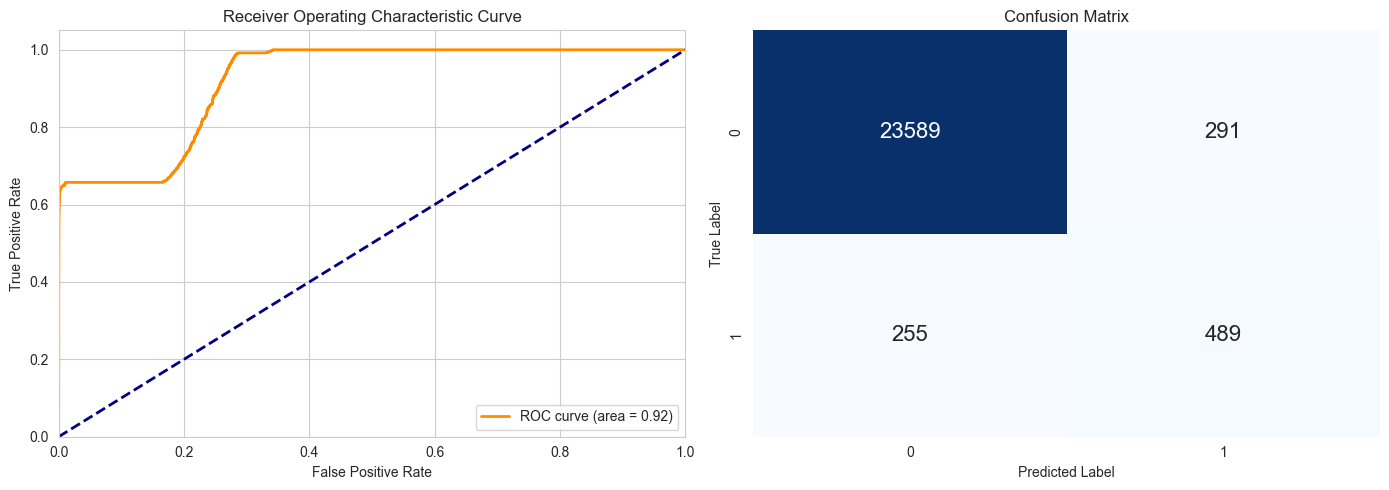

('              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99     23880\n           1       0.63      0.66      0.64       744\n\n    accuracy                           0.98     24624\n   macro avg       0.81      0.82      0.82     24624\nweighted avg       0.98      0.98      0.98     24624\n',
 array([[23589,   291],
        [  255,   489]], dtype=int64),
 0.919575588516057)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = pd.read_excel("open_crosion.xlsx")
# Splitting the data into training set from specimen 1 and testing set from specimen 2
specimen_1_data = data[data['Specimen'] == 1]
specimen_2_data = data[data['Specimen'] == 2]

input_features = ['Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
target_variable = 'Label'

X_train = specimen_1_data[input_features]
y_train = specimen_1_data[target_variable]

X_test = specimen_2_data[input_features]
y_test = specimen_2_data[target_variable]

# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predicting the probabilities and converting to binary predictions using a 0.5 threshold
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the results
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# Subplot 2: Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Adjusting layout
plt.tight_layout()
plt.show()

classification_rep, confusion_mat, roc_auc


### Random Forest

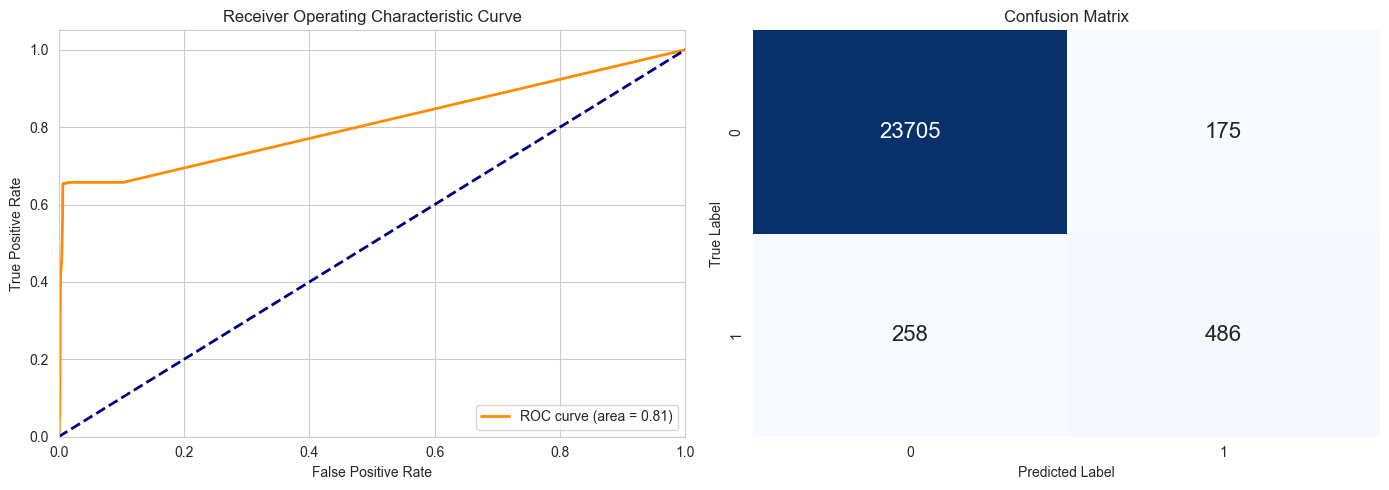

('              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99     23880\n           1       0.74      0.65      0.69       744\n\n    accuracy                           0.98     24624\n   macro avg       0.86      0.82      0.84     24624\nweighted avg       0.98      0.98      0.98     24624\n',
 array([[23705,   175],
        [  258,   486]], dtype=int64),
 0.8087858929504151)

In [8]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_excel("open_crosion.xlsx")

# Splitting the data
specimen_1_data = data[data['Specimen'] == 1]
specimen_2_data = data[data['Specimen'] == 2]

input_features = ['Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
target_variable = 'Label'

X_train = specimen_1_data[input_features]
y_train = specimen_1_data[target_variable]

X_test = specimen_2_data[input_features]
y_test = specimen_2_data[target_variable]

# Initializing and training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluating the model
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the results
sns.set_style("whitegrid")
plt.figure(figsize=(14, 5))

# Subplot 1: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")

# Subplot 2: Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

classification_rep, confusion_mat, roc_auc


In [13]:
# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

x_min, x_max, y_min, y_max


(0.0, 126.0, 0.0, 86.0)

In [14]:
# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = data['X-Coordinate'] / 10
data['Y-Coordinate_Adjusted_10'] = data['Y-Coordinate'] / 10

# Display the first few rows of the adjusted data
data[['X-Coordinate', 'Y-Coordinate', 'X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].head()


X-Coordinate  Y-Coordinate  X-Coordinate_Adjusted_10  \
0          53.5          40.0                      5.35   
1          54.0          30.5                      5.40   
2          54.0          31.0                      5.40   
3          54.0          31.5                      5.40   
4          54.0          32.0                      5.40   

   Y-Coordinate_Adjusted_10  
0                      4.00  
1                      3.05  
2                      3.10  
3                      3.15  
4                      3.20

### Adaptive Sampling (Isotropic RBF Kernel) - Eperiment 17

C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\612667566.py:61: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


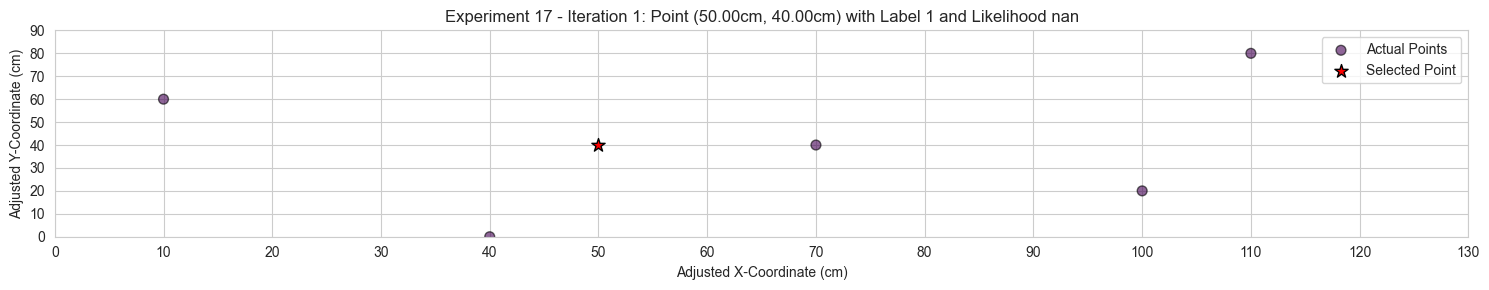

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("open_crosion.xlsx")

# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)


n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'  #  'Label' is the target variable
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_model = GaussianProcessRegressor()


def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

# Get LHS samples for X and Y coordinates
lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], 25)
lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], 25)

# Find the nearest data points to these sampled points
initial_samples_17 = []
for x, y in zip(lhs_x_samples, lhs_y_samples):
    distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data.iloc[distances.idxmin()]
    initial_samples_17.append(nearest_point)

initial_samples_17 = pd.DataFrame(initial_samples_17)

# Placeholder for selected points and their details during iterations
selected_points_17 = []
remaining_points_17 = data.drop(initial_samples_17.index)

# Tweaking the weights for the utility function to prioritize finding the target
# Increasing the weight for predicted likelihood and uncertainty 
w1, w2, w3 = 0.5, 0.1, 0.4  # Adjusted weights



# Adaptive Sampling with Gaussian Process Regression
for i in range(n_iterations):
    gpr_model.fit(initial_samples_17[input_features_gpr_adj], initial_samples_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_17 = pd.concat([initial_samples_17, new_point])
    remaining_points_17 = remaining_points_17.drop(new_point.index)

# Visualization
plt.figure(figsize=(15, 3 * len(selected_points_17)))
for i, (iteration, coordinates, label, likelihood) in enumerate(selected_points_17):
    plt.subplot(len(selected_points_17), 1, i + 1)
    plt.scatter(initial_samples_17['X-Coordinate_Adjusted_10'] * 10, initial_samples_17['Y-Coordinate_Adjusted_10'] * 10, 
                c=initial_samples_17['Label'], cmap='viridis', s=50, edgecolor='k', alpha=0.6, label='Actual Points')
    plt.scatter(coordinates[0, 0] * 10, coordinates[0, 1] * 10, c='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    plt.title(f'Experiment 17 - Iteration {iteration}: Point ({coordinates[0, 0]*10:.2f}cm, {coordinates[0, 1]*10:.2f}cm) with Label {label[0]} and Likelihood {likelihood:.2f}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()
plt.tight_layout()
plt.show()



## Adaptive Sampling (Anisotropic RBF Kernel)- Experimental 17

C:\Users\gzia\AppData\Local\Temp\ipykernel_14012\3790257176.py:61: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


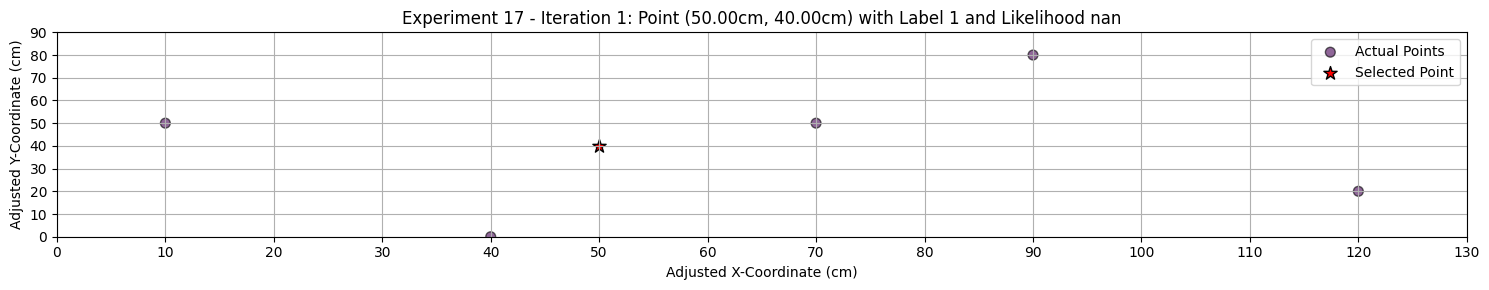

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import RBF
# Load data
data = pd.read_excel("open_crosion.xlsx")

# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)


n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'  #  'Label' is the target variable
from sklearn.gaussian_process import GaussianProcessRegressor
rbf_kernel_aniso = RBF(length_scale=[1.0, 1.0])  # Assuming you want to start with the same scale

gpr_model = GaussianProcessRegressor(kernel=rbf_kernel_aniso)


def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

# Get LHS samples for X and Y coordinates
lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], 5)
lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], 5)

# Find the nearest data points to these sampled points
initial_samples_17 = []
for x, y in zip(lhs_x_samples, lhs_y_samples):
    distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data.iloc[distances.idxmin()]
    initial_samples_17.append(nearest_point)

initial_samples_17 = pd.DataFrame(initial_samples_17)

# Placeholder for selected points and their details during iterations
selected_points_17 = []
remaining_points_17 = data.drop(initial_samples_17.index)

# Tweaking the weights for the utility function to prioritize finding the target
# Increasing the weight for predicted likelihood and uncertainty 
w1, w2, w3 = 0.5, 0.1, 0.4  # Adjusted weights



# Adaptive Sampling with Gaussian Process Regression
for i in range(n_iterations):
    gpr_model.fit(initial_samples_17[input_features_gpr_adj], initial_samples_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_17 = pd.concat([initial_samples_17, new_point])
    remaining_points_17 = remaining_points_17.drop(new_point.index)

# Visualization
plt.figure(figsize=(15, 3 * len(selected_points_17)))
for i, (iteration, coordinates, label, likelihood) in enumerate(selected_points_17):
    plt.subplot(len(selected_points_17), 1, i + 1)
    plt.scatter(initial_samples_17['X-Coordinate_Adjusted_10'] * 10, initial_samples_17['Y-Coordinate_Adjusted_10'] * 10, 
                c=initial_samples_17['Label'], cmap='viridis', s=50, edgecolor='k', alpha=0.6, label='Actual Points')
    plt.scatter(coordinates[0, 0] * 10, coordinates[0, 1] * 10, c='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    plt.title(f'Experiment 17 - Iteration {iteration}: Point ({coordinates[0, 0]*10:.2f}cm, {coordinates[0, 1]*10:.2f}cm) with Label {label[0]} and Likelihood {likelihood:.2f}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()
plt.tight_layout()
plt.show()



# Maten Kernel 

c:\Users\gzia\Documents\GitHub\reincarnate_wp2\.wp2\Lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


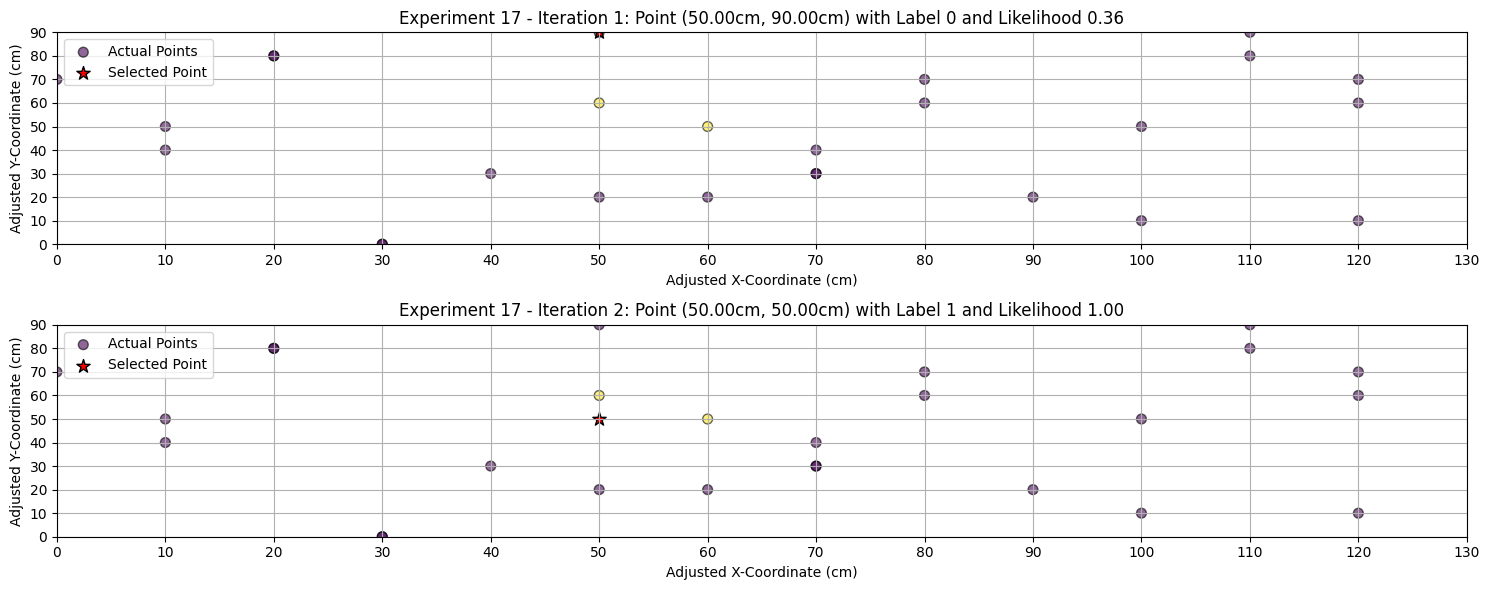

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern


# Load data
data = pd.read_excel("open_crosion.xlsx")

# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)


n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'  #  'Label' is the target variable
# Define the Matern kernel
matern_kernel = Matern(nu=1.5)

# Create a Gaussian Process Regressor model using the Matern kernel
gpr_model = GaussianProcessRegressor(kernel=matern_kernel)


def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

# Get LHS samples for X and Y coordinates
lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], 25)
lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], 25)

# Find the nearest data points to these sampled points
initial_samples_17 = []
for x, y in zip(lhs_x_samples, lhs_y_samples):
    distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data.iloc[distances.idxmin()]
    initial_samples_17.append(nearest_point)

initial_samples_17 = pd.DataFrame(initial_samples_17)

# Placeholder for selected points and their details during iterations
selected_points_17 = []
remaining_points_17 = data.drop(initial_samples_17.index)

# Tweaking the weights for the utility function to prioritize finding the target
# Increasing the weight for predicted likelihood and uncertainty 
w1, w2, w3 = 0.5, 0.1, 0.4  # Adjusted weights



# Adaptive Sampling with Gaussian Process Regression
for i in range(n_iterations):
    gpr_model.fit(initial_samples_17[input_features_gpr_adj], initial_samples_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_17 = pd.concat([initial_samples_17, new_point])
    remaining_points_17 = remaining_points_17.drop(new_point.index)

# Visualization
plt.figure(figsize=(15, 3 * len(selected_points_17)))
for i, (iteration, coordinates, label, likelihood) in enumerate(selected_points_17):
    plt.subplot(len(selected_points_17), 1, i + 1)
    plt.scatter(initial_samples_17['X-Coordinate_Adjusted_10'] * 10, initial_samples_17['Y-Coordinate_Adjusted_10'] * 10, 
                c=initial_samples_17['Label'], cmap='viridis', s=50, edgecolor='k', alpha=0.6, label='Actual Points')
    plt.scatter(coordinates[0, 0] * 10, coordinates[0, 1] * 10, c='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    plt.title(f'Experiment 17 - Iteration {iteration}: Point ({coordinates[0, 0]*10:.2f}cm, {coordinates[0, 1]*10:.2f}cm) with Label {label[0]} and Likelihood {likelihood:.2f}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()
plt.tight_layout()
plt.show()



### Adaptive Sampling - Experiment 18

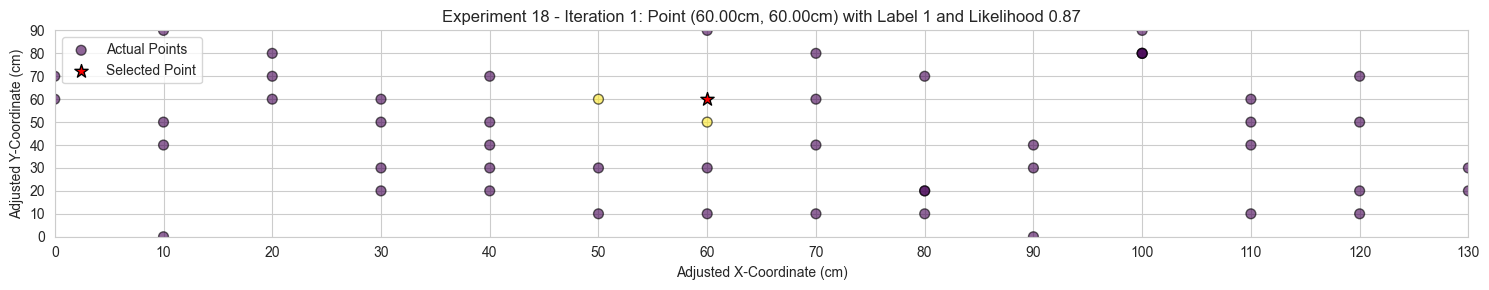

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("open_crosion.xlsx")

# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)

# Assuming some missing parts of the code
n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'  # Assuming 'Label' is the target variable
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_model = GaussianProcessRegressor()

# Rest of the code remains unchanged
# I'll skip the part where you defined the latin_hypercube_sampling function and 
# directly go to the Adaptive Sampling with Gaussian Process Regression part
def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples


# Filter data for Experiment 18
data_18 = data[data['Experiment'] == 18]
# Resetting the index for data_18
data_18 = data_18.reset_index(drop=True)

# Get LHS samples for X and Y coordinates of Experiment 18
lhs_x_samples_18 = latin_hypercube_sampling(data_18['X-Coordinate_Adjusted_10'], 50)
lhs_y_samples_18 = latin_hypercube_sampling(data_18['Y-Coordinate_Adjusted_10'], 50)




# Find the nearest data points to these sampled points for Experiment 18 again
initial_samples_18 = []
for x, y in zip(lhs_x_samples_18, lhs_y_samples_18):
    distances = np.sqrt((data_18['X-Coordinate_Adjusted_10'] - x) ** 2 + (data_18['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data_18.iloc[distances.idxmin()]
    initial_samples_18.append(nearest_point)

initial_samples_18 = pd.DataFrame(initial_samples_18)

# Placeholder for selected points and their details during iterations for Experiment 18
selected_points_18 = []
remaining_points_18 = data_18.drop(initial_samples_18.index)

# Adaptive Sampling with Gaussian Process Regression for Experiment 18
for i in range(n_iterations):
    gpr_model.fit(initial_samples_18[input_features_gpr_adj], initial_samples_18[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_18[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_18['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_18['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_18['X-Coordinate_Adjusted_10'], initial_samples_18['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_18.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_18.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_18 = pd.concat([initial_samples_18, new_point])
    remaining_points_18 = remaining_points_18.drop(new_point.index)

# Visualization for Experiment 18
plt.figure(figsize=(15, 3 * len(selected_points_18)))
for i, (iteration, coordinates, label, likelihood) in enumerate(selected_points_18):
    plt.subplot(len(selected_points_18), 1, i + 1)
    plt.scatter(initial_samples_18['X-Coordinate_Adjusted_10'] * 10, initial_samples_18['Y-Coordinate_Adjusted_10'] * 10, 
                c=initial_samples_18['Label'], cmap='viridis', s=50, edgecolor='k', alpha=0.6, label='Actual Points')
    plt.scatter(coordinates[0, 0] * 10, coordinates[0, 1] * 10, c='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    plt.title(f'Experiment 18 - Iteration {iteration}: Point ({coordinates[0, 0]*10:.2f}cm, {coordinates[0, 1]*10:.2f}cm) with Label {label[0]} and Likelihood {likelihood:.2f}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()
plt.tight_layout()
plt.show()


### Random Sampling - Experiment 17

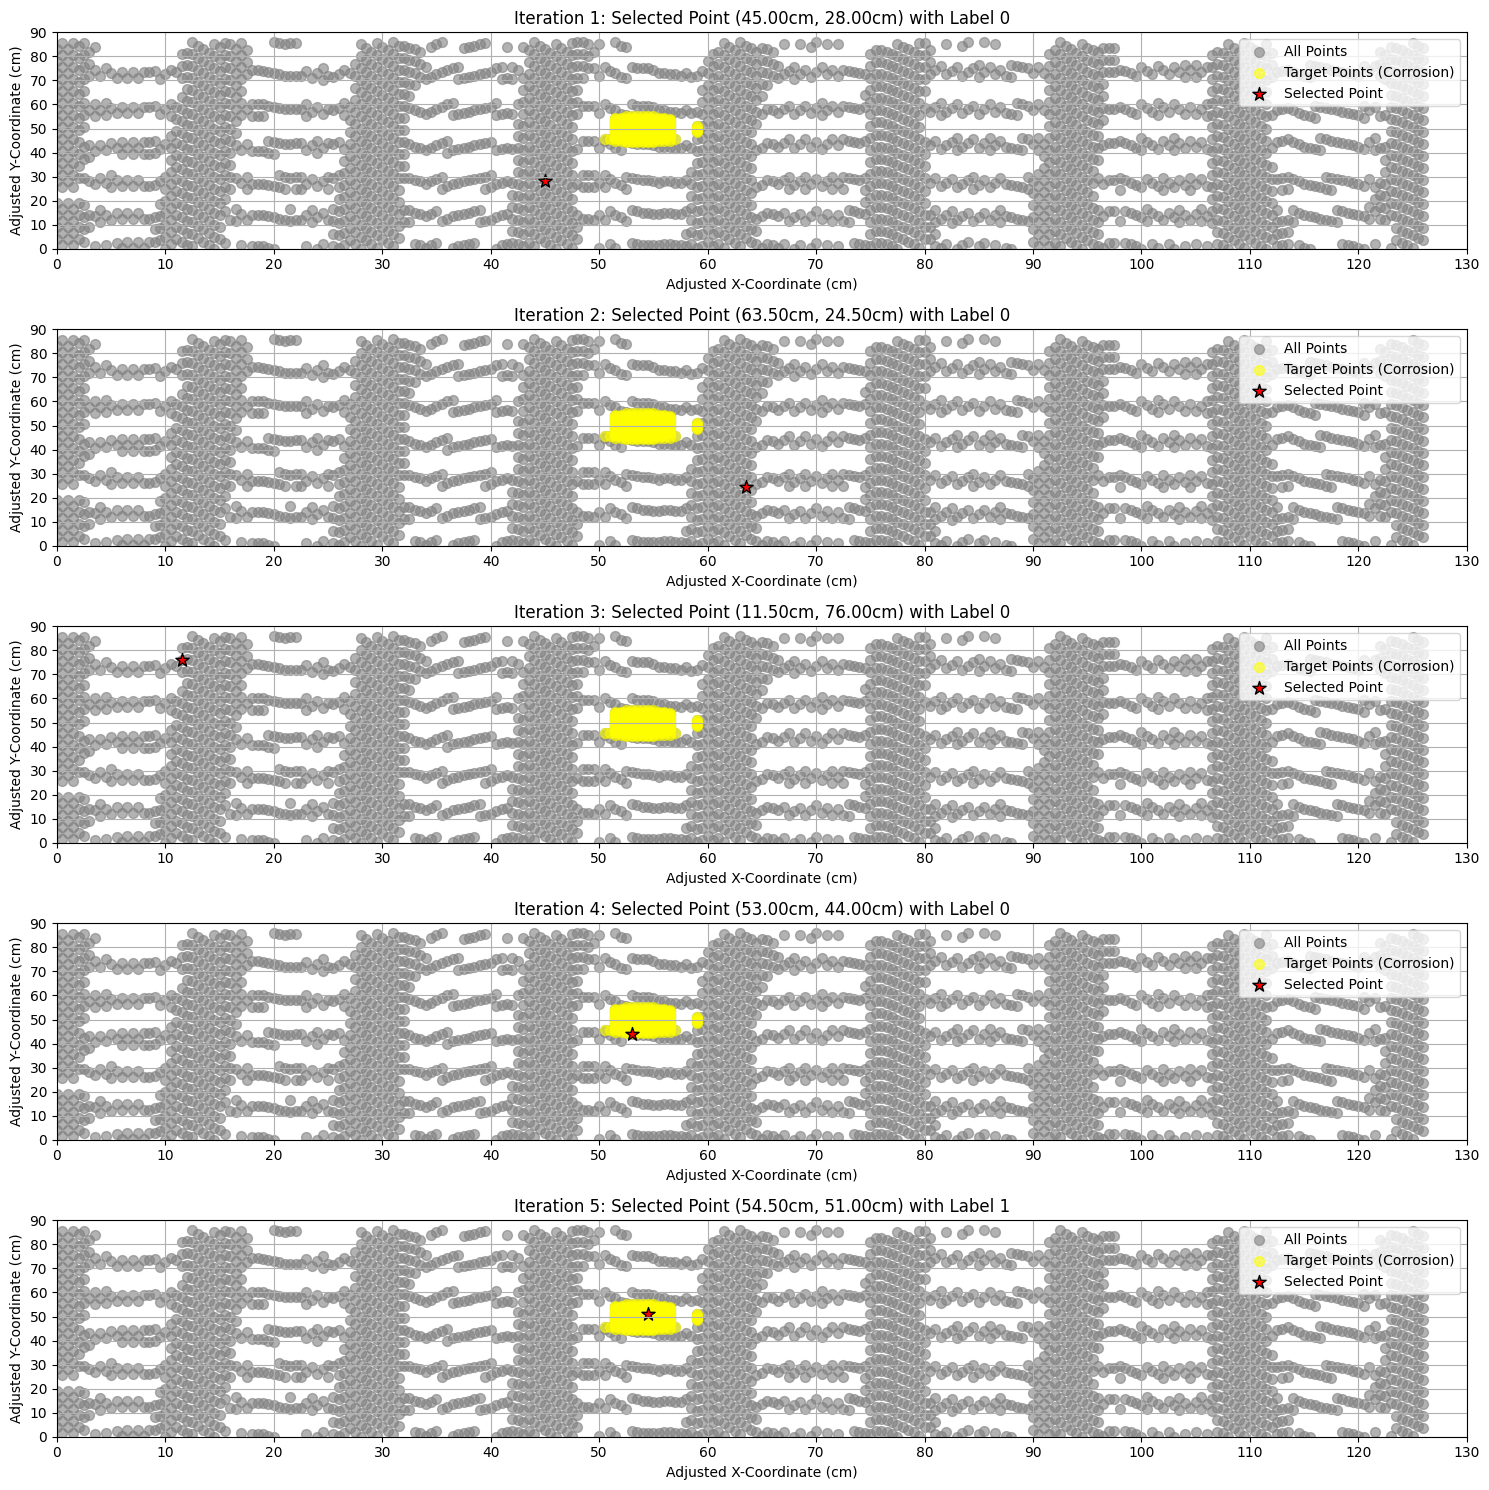

5

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("open_crosion.xlsx")


# Defining the target variable column name
target_variable_gpr_adj = 'Label'

# Re-run the random sampling process
# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = data['X-Coordinate'] / 10
data['Y-Coordinate_Adjusted_10'] = data['Y-Coordinate'] / 10

# data_17 =  data
data_17 = data[data['Experiment'] == 17]

selected_points_random_17 = []

remaining_points_17_random = data_17.copy()

iteration = 0
while True:
    iteration += 1
    new_point = remaining_points_17_random.sample(n=10)
    
    selected_points_random_17.append(new_point)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:
        break
    
    remaining_points_17_random = remaining_points_17_random.drop(new_point.index)

# Visualization for Random Sampling
plt.figure(figsize=(15, 3 * len(selected_points_random_17)))

for i, new_point in enumerate(selected_points_random_17):
    plt.subplot(len(selected_points_random_17), 1, i + 1)
    plt.scatter(data_17['X-Coordinate_Adjusted_10'] * 10, data_17['Y-Coordinate_Adjusted_10'] * 10, 
                color='gray', s=50, alpha=0.6, label='All Points')
    
    corrosion_points = data_17[data_17['Label'] == 1]
    plt.scatter(corrosion_points['X-Coordinate_Adjusted_10'] * 10, corrosion_points['Y-Coordinate_Adjusted_10'] * 10, 
                color='yellow', s=50, alpha=0.6, label='Target Points (Corrosion)')
    
    plt.scatter(new_point['X-Coordinate_Adjusted_10'].values[0] * 10, new_point['Y-Coordinate_Adjusted_10'].values[0] * 10, 
                color='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    
    plt.title(f'Iteration {i+1}: Selected Point ({new_point["X-Coordinate_Adjusted_10"].values[0]*10:.2f}cm, {new_point["Y-Coordinate_Adjusted_10"].values[0]*10:.2f}cm) with Label {new_point["Label"].values[0]}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()

plt.tight_layout()
plt.show()

iteration  # Returning the number of samples taken to find corrosion using Random Sampling for Experiment 17


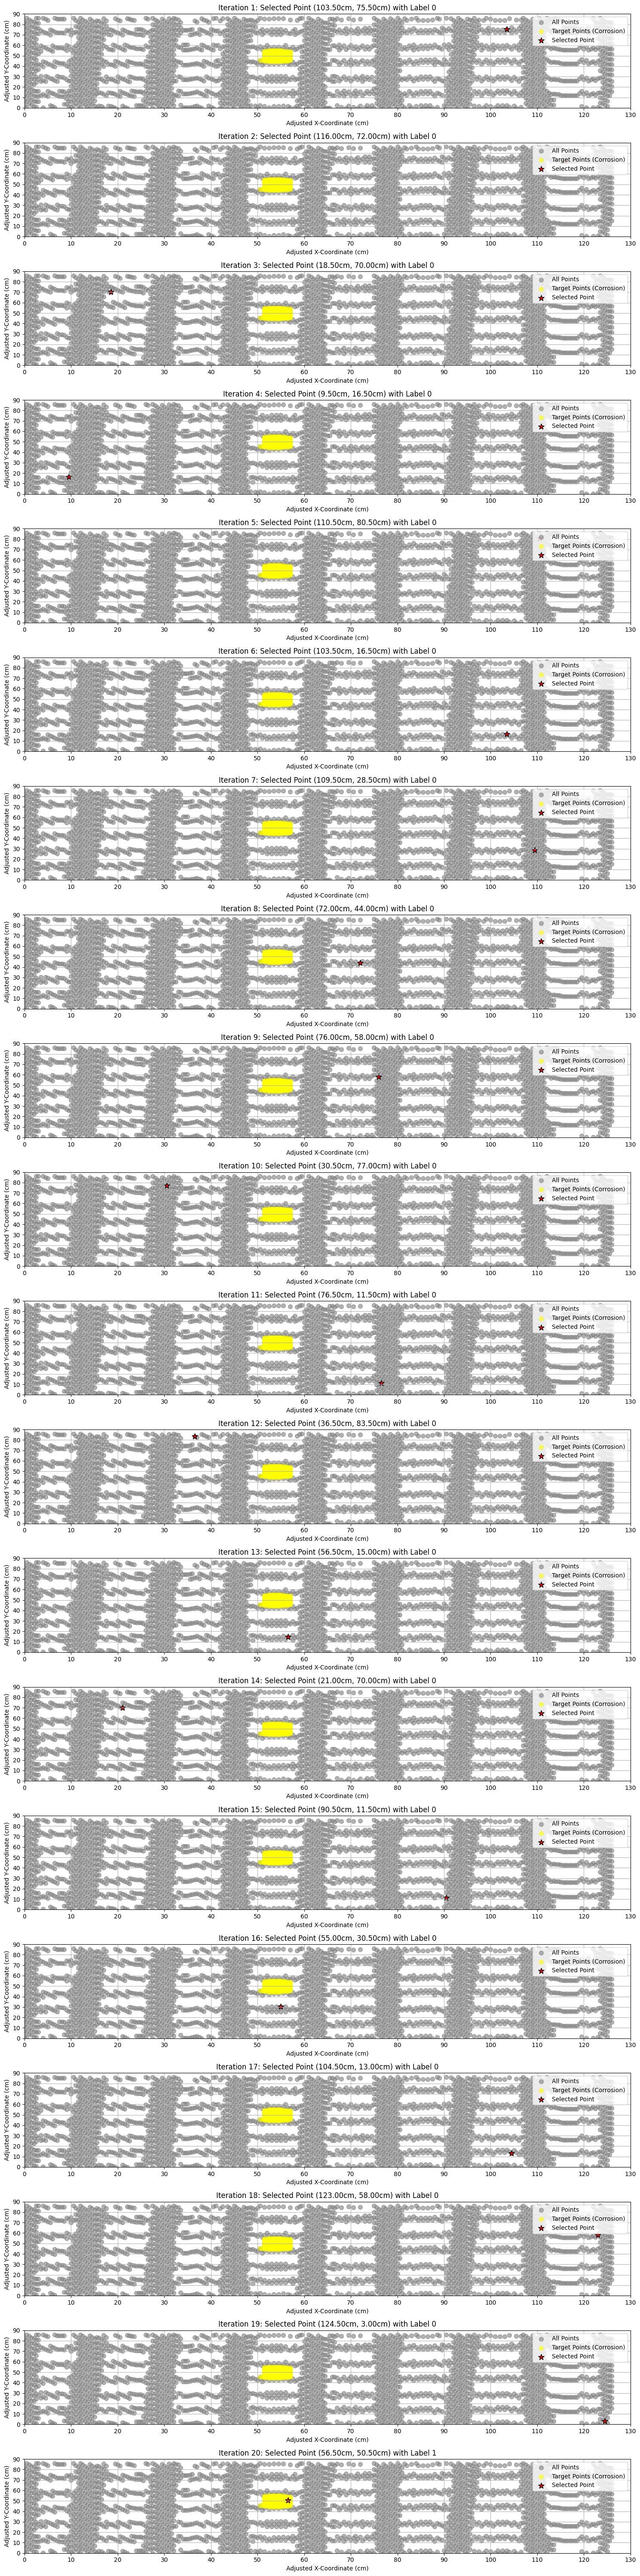

20

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("open_crosion.xlsx")


# Defining the target variable column name
target_variable_gpr_adj = 'Label'

# Re-run the random sampling process
# Determine the boundaries of the current X and Y coordinates
x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = data['X-Coordinate'] / 10
data['Y-Coordinate_Adjusted_10'] = data['Y-Coordinate'] / 10

# data_17 =  data
data_18 = data[data['Experiment'] == 18]

selected_points_random_18 = []

remaining_points_18_random = data_18.copy()

iteration = 0
while True:
    iteration += 1
    new_point = remaining_points_18_random.sample(n=50)
    
    selected_points_random_18.append(new_point)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:
        break
    
    remaining_points_18_random = remaining_points_18_random.drop(new_point.index)

# Visualization for Random Sampling
plt.figure(figsize=(15, 3 * len(selected_points_random_18)))

for i, new_point in enumerate(selected_points_random_18):
    plt.subplot(len(selected_points_random_18), 1, i + 1)
    plt.scatter(data_18['X-Coordinate_Adjusted_10'] * 10, data_18['Y-Coordinate_Adjusted_10'] * 10, 
                color='gray', s=50, alpha=0.6, label='All Points')
    
    corrosion_points = data_18[data_18['Label'] == 1]
    plt.scatter(corrosion_points['X-Coordinate_Adjusted_10'] * 10, corrosion_points['Y-Coordinate_Adjusted_10'] * 10, 
                color='yellow', s=50, alpha=0.6, label='Target Points (Corrosion)')
    
    plt.scatter(new_point['X-Coordinate_Adjusted_10'].values[0] * 10, new_point['Y-Coordinate_Adjusted_10'].values[0] * 10, 
                color='red', s=100, edgecolor='k', marker='*', label='Selected Point')
    
    plt.title(f'Iteration {i+1}: Selected Point ({new_point["X-Coordinate_Adjusted_10"].values[0]*10:.2f}cm, {new_point["Y-Coordinate_Adjusted_10"].values[0]*10:.2f}cm) with Label {new_point["Label"].values[0]}')
    plt.xlabel('Adjusted X-Coordinate (cm)')
    plt.ylabel('Adjusted Y-Coordinate (cm)')
    plt.grid(True)
    plt.xticks(np.arange(0, 131, 10))
    plt.yticks(np.arange(0, 91, 10))
    plt.xlim([0, 130])
    plt.ylim([0, 90])
    plt.legend()

plt.tight_layout()
plt.show()

iteration  # Returning the number of samples taken to find corrosion using Random Sampling for Experiment 17


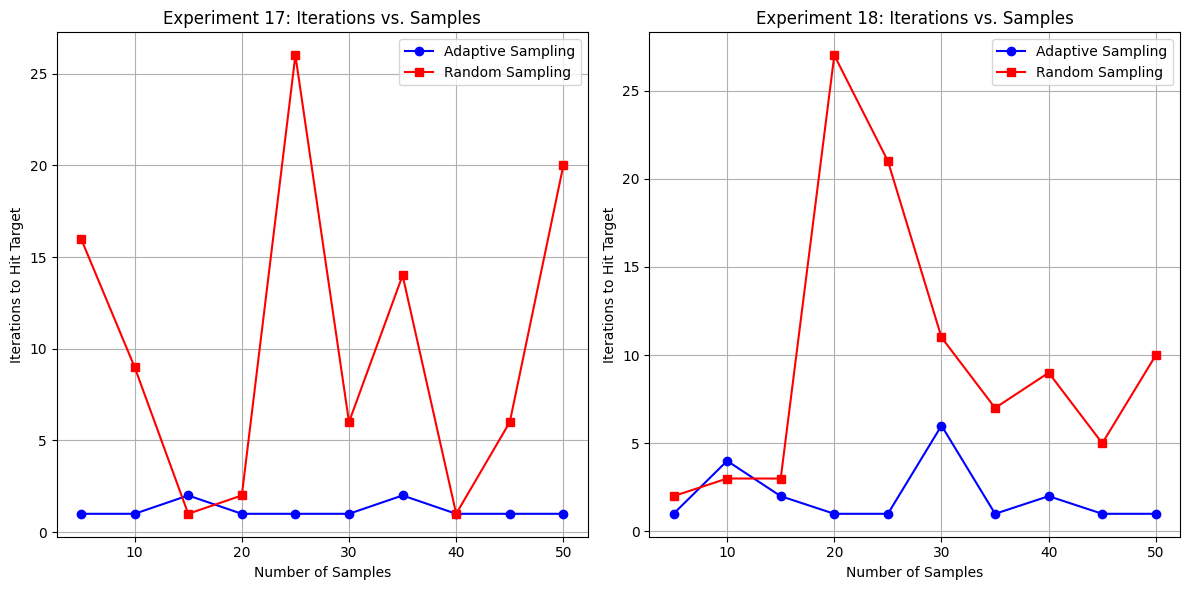

In [86]:
# Data for Adaptive and Random Sampling for both Experiments 17 & 18

# Adaptive Sampling
adaptive_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_17 = [1, 1, 2, 1, 1, 1, 2, 1, 1, 1]

adaptive_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_18 = [1, 4, 2, 1, 1, 6, 1, 2, 1, 1]

# Random Sampling
random_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_17 = [16, 9, 1, 2, 26, 6, 14, 1, 6, 20]

random_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_18 = [2, 3, 3, 27, 21, 11, 7, 9, 5, 10]

# Plotting
plt.figure(figsize=(12, 6))

# Experiment 17
plt.subplot(1, 2, 1)
plt.plot(adaptive_samples_17, adaptive_iterations_17, 'o-', label='Adaptive Sampling', color='blue')
plt.plot(random_samples_17, random_iterations_17, 's-', label='Random Sampling', color='red')
plt.title('Experiment 17: Iterations vs. Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Iterations to Hit Target')
plt.legend()
plt.grid(True)

# Experiment 18
plt.subplot(1, 2, 2)
plt.plot(adaptive_samples_18, adaptive_iterations_18, 'o-', label='Adaptive Sampling', color='blue')
plt.plot(random_samples_18, random_iterations_18, 's-', label='Random Sampling', color='red')
plt.title('Experiment 18: Iterations vs. Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Iterations to Hit Target')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


C:\Users\gzia\AppData\Local\Temp\ipykernel_22472\2946658929.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(adaptive_iterations_17, label='Adaptive Sampling', color='blue', bins=10, kde=False)
C:\Users\gzia\AppData\Local\Temp\ipykernel_22472\2946658929.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



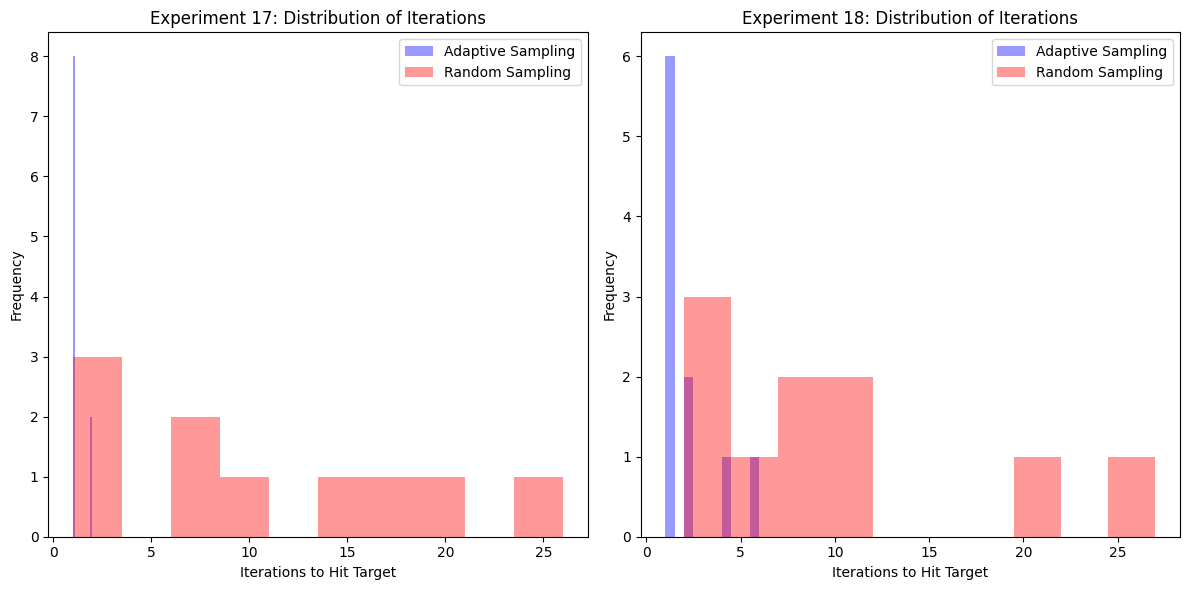

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Adaptive and Random Sampling for both Experiments 17 & 18
adaptive_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_17 = [1, 1, 2, 1, 1, 1, 2, 1, 1, 1]

adaptive_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_18 = [1, 4, 2, 1, 1, 6, 1, 2, 1, 1]

random_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_17 = [16, 9, 1, 2, 26, 6, 14, 1, 6, 20]

random_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_18 = [2, 3, 3, 27, 21, 11, 7, 9, 5, 10]

# Plotting
plt.figure(figsize=(12, 6))

# Experiment 17
plt.subplot(1, 2, 1)
sns.distplot(adaptive_iterations_17, label='Adaptive Sampling', color='blue', bins=10, kde=False)
sns.distplot(random_iterations_17, label='Random Sampling', color='red', bins=10, kde=False)
plt.title('Experiment 17: Distribution of Iterations')
plt.xlabel('Iterations to Hit Target')
plt.ylabel('Frequency')
plt.legend()

# Experiment 18
plt.subplot(1, 2, 2)
sns.distplot(adaptive_iterations_18, label='Adaptive Sampling', color='blue', bins=10, kde=False)
sns.distplot(random_iterations_18, label='Random Sampling', color='red', bins=10, kde=False)
plt.title('Experiment 18: Distribution of Iterations')
plt.xlabel('Iterations to Hit Target')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


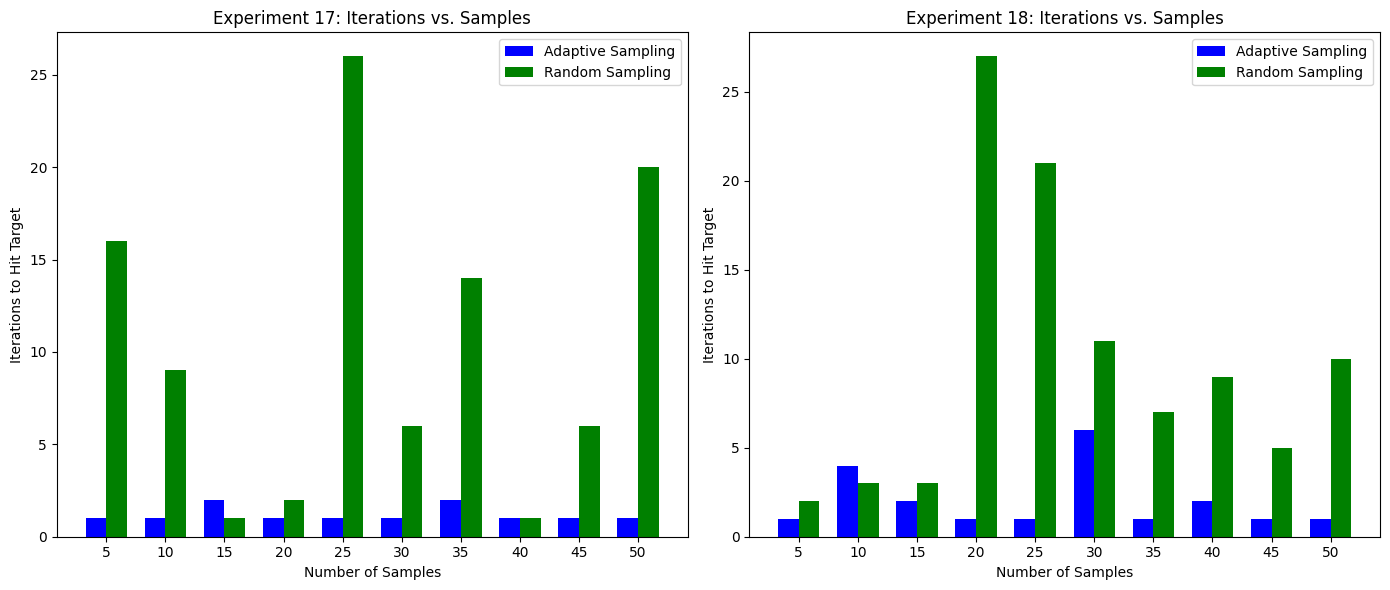

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data for Adaptive and Random Sampling for both Experiments 17 & 18
adaptive_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_17 = [1, 1, 2, 1, 1, 1, 2, 1, 1, 1]

adaptive_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
adaptive_iterations_18 = [1, 4, 2, 1, 1, 6, 1, 2, 1, 1]

random_samples_17 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_17 = [16, 9, 1, 2, 26, 6, 14, 1, 6, 20]

random_samples_18 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
random_iterations_18 = [2, 3, 3, 27, 21, 11, 7, 9, 5, 10]

# Bar width
bar_width = 0.35
index = np.arange(len(adaptive_samples_17))

# Plotting
plt.figure(figsize=(14, 6))

# Experiment 17
plt.subplot(1, 2, 1)
bar1 = plt.bar(index, adaptive_iterations_17, bar_width, label='Adaptive Sampling', color='blue')
bar2 = plt.bar(index + bar_width, random_iterations_17, bar_width, label='Random Sampling', color='green')
plt.xlabel('Number of Samples')
plt.ylabel('Iterations to Hit Target')
plt.title('Experiment 17: Iterations vs. Samples')
plt.xticks(index + bar_width/2, adaptive_samples_17)  # Positioning the x-labels in the center of grouped bars
plt.legend()

# Experiment 18
plt.subplot(1, 2, 2)
bar1 = plt.bar(index, adaptive_iterations_18, bar_width, label='Adaptive Sampling', color='blue')
bar2 = plt.bar(index + bar_width, random_iterations_18, bar_width, label='Random Sampling', color='green')
plt.xlabel('Number of Samples')
plt.ylabel('Iterations to Hit Target')
plt.title('Experiment 18: Iterations vs. Samples')
plt.xticks(index + bar_width/2, adaptive_samples_18)  # Positioning the x-labels in the center of grouped bars
plt.legend()

plt.tight_layout()
plt.show()


In [25]:
# Reloading the dataset
dataset = pd.read_excel("open_crosion.xlsx")
data_filtered = data.copy()
# Adjusting coordinates to a 10x13 grid
data_filtered['X-Coordinate'] = pd.cut(data_filtered['X-Coordinate'], bins=10, labels=False, retbins=False)
data_filtered['Y-Coordinate'] = pd.cut(data_filtered['Y-Coordinate'], bins=13, labels=False, retbins=False)

# Identify unique experiments for each specimen
experiments_specimen_1 = data_filtered[data_filtered['Specimen'] == 1]['Experiment'].unique()
experiments_specimen_2 = data_filtered[data_filtered['Specimen'] == 2]['Experiment'].unique()

experiments_specimen_1, experiments_specimen_2

(array([5, 6, 7, 8, 9, 1, 2, 3, 4], dtype=int64),
 array([10, 17, 18, 11, 12, 13, 14, 15, 16], dtype=int64))

C:\Users\gzia\AppData\Local\Temp\ipykernel_16884\1836470435.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.9, 0.95])


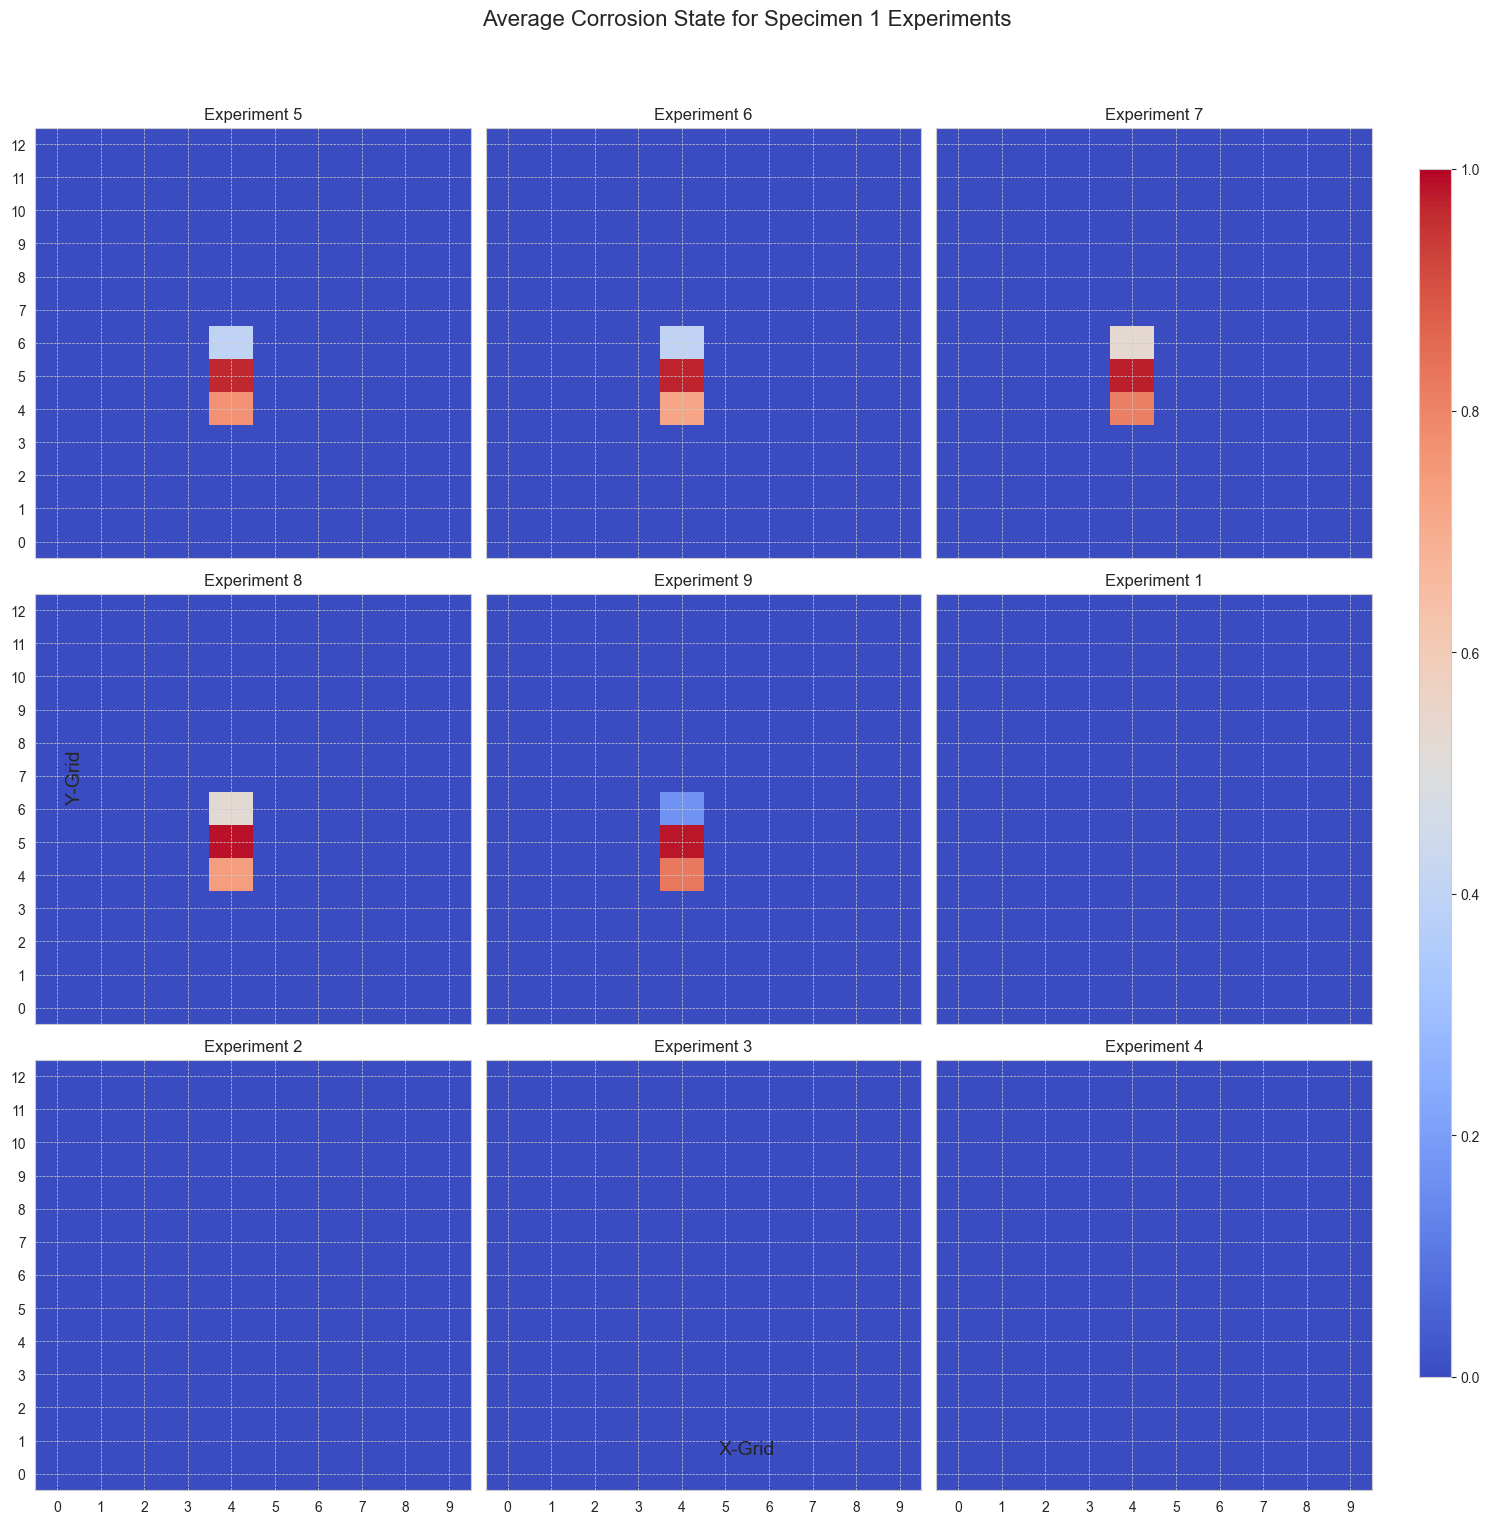

C:\Users\gzia\AppData\Local\Temp\ipykernel_16884\1836470435.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0.03, 0.03, 0.9, 0.95])


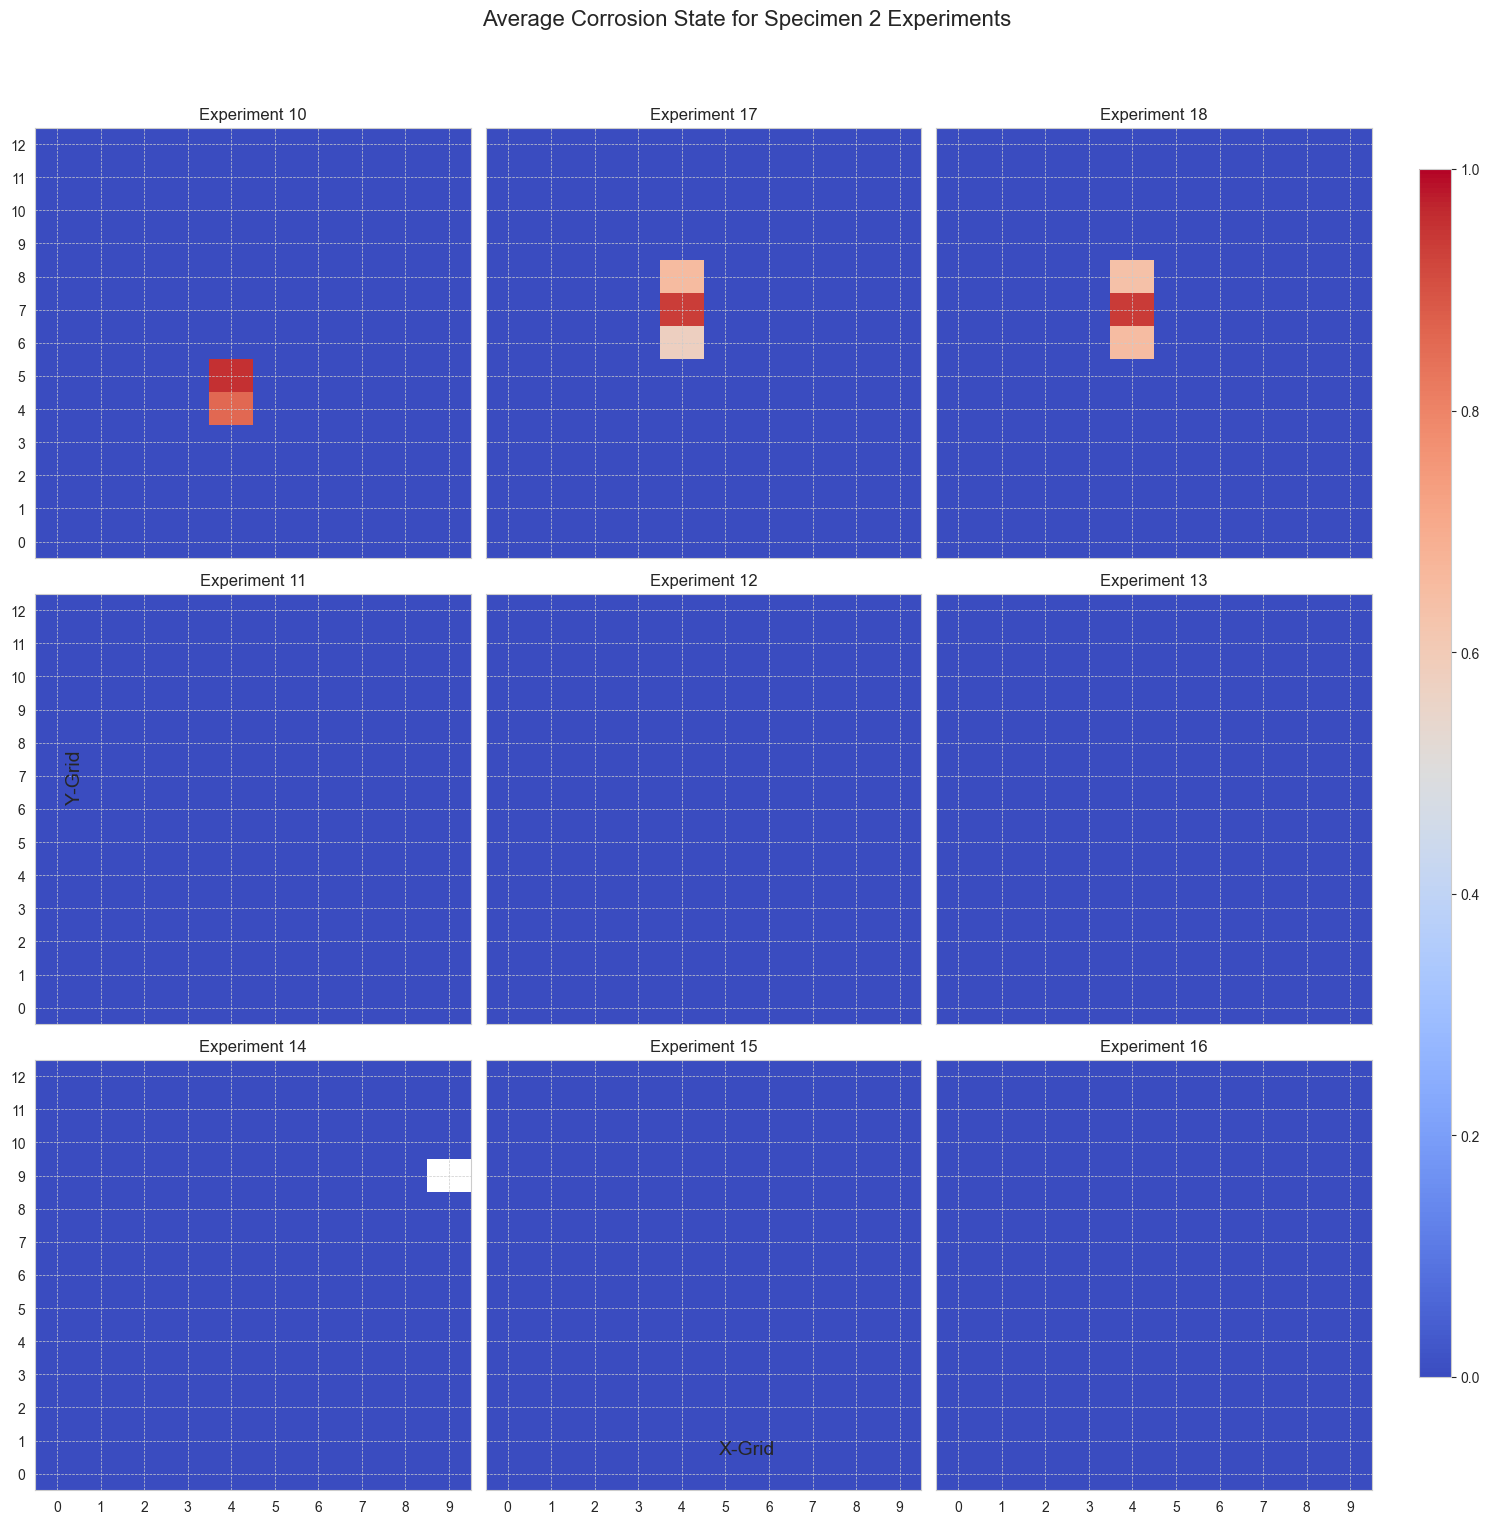

In [26]:
# Visualizing the data as per the provided code

# Create a plot for each experiment of Specimen 1
fig, axes = plt.subplots(3, 3, figsize=(16, 16), sharex=True, sharey=True)
fig.suptitle('Average Corrosion State for Specimen 1 Experiments', fontsize=16)

for idx, exp in enumerate(experiments_specimen_1):
    ax = axes[idx // 3, idx % 3]  # Adjust index
    exp_data = grouped_data[grouped_data['Experiment'] == exp].pivot(index='Y-Grid', columns='X-Grid', values='Label')
    
    # Plotting
    cax = ax.imshow(exp_data, cmap='coolwarm', aspect='auto', origin='lower', extent=[-0.5, 9.5, -0.5, 12.5], vmin=0, vmax=1)
    ax.set_title(f'Experiment {exp}')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xticks(range(10))
    ax.set_yticks(range(13))

# Add a common colorbar
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
fig.colorbar(cax, cax=cbar_ax)

# Add common labels and title
fig.text(0.5, 0.08, 'X-Grid', ha='center', va='center', fontsize=14)
fig.text(0.08, 0.5, 'Y-Grid', ha='center', va='center', rotation='vertical', fontsize=14)

# Adjust layout and show plots for Specimen 1
plt.tight_layout(rect=[0.03, 0.03, 0.9, 0.95])
plt.show()

# Create a plot for each experiment of Specimen 2
fig, axes = plt.subplots(3, 3, figsize=(16, 16), sharex=True, sharey=True)
fig.suptitle('Average Corrosion State for Specimen 2 Experiments', fontsize=16)

for idx, exp in enumerate(experiments_specimen_2):
    ax = axes[idx // 3, idx % 3]  # Adjust index
    exp_data = grouped_data[grouped_data['Experiment'] == exp].pivot(index='Y-Grid', columns='X-Grid', values='Label')
    
    # Plotting
    cax = ax.imshow(exp_data, cmap='coolwarm', aspect='auto', origin='lower', extent=[-0.5, 9.5, -0.5, 12.5], vmin=0, vmax=1)
    ax.set_title(f'Experiment {exp}')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.set_xticks(range(10))
    ax.set_yticks(range(13))

# Add a common colorbar
cbar_ax = fig.add_axes([0.92, 0.125, 0.02, 0.755])
fig.colorbar(cax, cax=cbar_ax)

# Add common labels and title
fig.text(0.5, 0.08, 'X-Grid', ha='center', va='center', fontsize=14)
fig.text(0.08, 0.5, 'Y-Grid', ha='center', va='center', rotation='vertical', fontsize=14)

# Adjust layout and show plots for Specimen 2
plt.tight_layout(rect=[0.03, 0.03, 0.9, 0.95])
plt.show()


In [ ]:
# Extracting data for Experiment 10 and checking if there is any corrosion
experiment_10_data = data[data['Experiment'] == 10]
corrosion_present = (experiment_10_data['Label'] == 1).any()

corrosion_present


In [1]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Now, let's load the data and proceed with the logistic regression code
data = pd.read_excel("open_crosion.xlsx")

# Splitting the data into training set from specimen 1 and testing set from specimen 2
specimen_1_data = data[data['Specimen'] == 1]
specimen_2_data = data[data['Specimen'] == 2]

input_features = ['Feature 3', 'Feature 4', 'Feature 5', 'Feature 6']
target_variable = 'Label'

X_train = specimen_1_data[input_features]
y_train = specimen_1_data[target_variable]

X_test = specimen_2_data[input_features]
y_test = specimen_2_data[target_variable]

# Initializing and training the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predicting the probabilities and converting to binary predictions using a 0.5 threshold
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Storing the predictions for later use
logistic_regression_predictions = pd.DataFrame({
    'X-Coordinate': specimen_2_data['X-Coordinate'],
    'Y-Coordinate': specimen_2_data['Y-Coordinate'],
    'Prediction': y_pred
})

logistic_regression_predictions.head()


X-Coordinate  Y-Coordinate  Prediction
1210          53.5          30.0           0
1211          53.5          30.5           0
1212          53.5          31.0           0
1213          53.5          31.5           0
1214          53.5          32.0           0

In [2]:
# Importing necessary libraries for adaptive sampling
import numpy as np
# Importing GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Instantiate the Gaussian Process Regressor
gpr_model = GaussianProcessRegressor()
# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)

# Latin Hypercube Sampling function
def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

# Get LHS samples for X and Y coordinates
lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], 35)
lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], 35)

# Find the nearest data points to these sampled points
initial_samples_17 = []
for x, y in zip(lhs_x_samples, lhs_y_samples):
    distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data.iloc[distances.idxmin()]
    initial_samples_17.append(nearest_point)

initial_samples_17 = pd.DataFrame(initial_samples_17)

# Placeholder for selected points and their details during iterations
selected_points_17 = []
remaining_points_17 = data.drop(initial_samples_17.index)

# Tweaking the weights for the utility function to prioritize finding the target
# Increasing the weight for predicted likelihood and uncertainty 
w1, w2, w3 = 0.5, 0.1, 0.4  # Adjusted weights

# Adaptive Sampling with Gaussian Process Regression
n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'
gpr_model = GaussianProcessRegressor()

for i in range(n_iterations):
    gpr_model.fit(initial_samples_17[input_features_gpr_adj], initial_samples_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_17 = pd.concat([initial_samples_17, new_point])
    remaining_points_17 = remaining_points_17.drop(new_point.index)

# Extracting the points where the target (corrosion) was found by adaptive sampling
target_found_points = [point[1][0] for point in selected_points_17 if point[2] == 1]
target_found_points


[array([5, 5])]

In [3]:
# Adaptive Sampling with Gaussian Process Regression for Experiment 17

# Filtering data for Experiment 17
experiment_17_data = data[data['Experiment'] == 17]

# Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
experiment_17_data['X-Coordinate_Adjusted_10'] = (experiment_17_data['X-Coordinate'] / 10).round().astype(int)
experiment_17_data['Y-Coordinate_Adjusted_10'] = (experiment_17_data['Y-Coordinate'] / 10).round().astype(int)

# Placeholder for selected points and their details during iterations
selected_points_17 = []
remaining_points_17 = experiment_17_data.copy()

# Adaptive Sampling with Gaussian Process Regression
for i in range(n_iterations):
    gpr_model.fit(remaining_points_17[input_features_gpr_adj], remaining_points_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(remaining_points_17['X-Coordinate_Adjusted_10'], remaining_points_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)
    
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    remaining_points_17 = remaining_points_17.drop(new_point.index)

selected_points_17


C:\Users\gzia\AppData\Local\Temp\ipykernel_25012\358895710.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_17_data['X-Coordinate_Adjusted_10'] = (experiment_17_data['X-Coordinate'] / 10).round().astype(int)
C:\Users\gzia\AppData\Local\Temp\ipykernel_25012\358895710.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_17_data['Y-Coordinate_Adjusted_10'] = (experiment_17_data['Y-Coordinate'] / 10).round().astype(int)


[(1, array([[5, 5]]), array([1], dtype=int64), 1.0)]

In [4]:
# Using logistic regression to predict the selected points from adaptive sampling

# Extracting the input features for the selected point
selected_point_features = experiment_17_data[(experiment_17_data['X-Coordinate_Adjusted_10'] == 5) & 
                                            (experiment_17_data['Y-Coordinate_Adjusted_10'] == 5)][input_features]

# Predicting using logistic regression
selected_point_pred_prob = logreg_model.predict_proba(selected_point_features)[:, 1]
selected_point_pred = [1 if prob > 0.5 else 0 for prob in selected_point_pred_prob]

selected_point_pred


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [17]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor

# Define the latin_hypercube_sampling function
# ...
def latin_hypercube_sampling(data, n_samples):
    """Generate Latin Hypercube Samples from data."""
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

def run_adaptive_sampling(data, n_samples, n_iterations):
    # Initialize the Gaussian Process Regressor
    gpr_model = GaussianProcessRegressor()
    
    # Determine the boundaries of the current X and Y coordinates
    x_min, x_max = data['X-Coordinate'].min(), data['X-Coordinate'].max()
    y_min, y_max = data['Y-Coordinate'].min(), data['Y-Coordinate'].max()

    # Adjust the coordinates to fit the 13x10 grid for the 130x90 cm measurement field
    data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
    data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)

    # Set the input features and target variable for Gaussian Process Regression
    input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
    target_variable_gpr_adj = 'Label'  # Assuming 'Label' is the target variable
  
    # ... rest of the code remains unchanged ...


    # Get LHS samples for X and Y coordinates
    lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], n_samples)
    lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], n_samples)

    # Find the nearest data points to these sampled points
    initial_samples = []
    for x, y in zip(lhs_x_samples, lhs_y_samples):
        distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
        nearest_point = data.iloc[distances.idxmin()]
        initial_samples.append(nearest_point)

    initial_samples = pd.DataFrame(initial_samples)
    remaining_points = data.drop(initial_samples.index)

    w1, w2, w3 = 0.5, 0.1, 0.4  # Adjusted weights

    # Adaptive Sampling with Gaussian Process Regression
    for i in range(n_iterations):
        # Fit the model
        gpr_model.fit(initial_samples[input_features_gpr_adj], initial_samples[target_variable_gpr_adj])

        # Predict potentials and uncertainties for remaining points
        predicted_potentials, predicted_std = gpr_model.predict(remaining_points[input_features_gpr_adj], return_std=True)

        # Calculate utility scores and select the new point
        predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
        diversity_scores = np.min([np.sqrt((remaining_points[input_features_gpr_adj[0]] - x) ** 2 + 
                                           (remaining_points[input_features_gpr_adj[1]] - y) ** 2) 
                                   for x, y in zip(initial_samples[input_features_gpr_adj[0]], initial_samples[input_features_gpr_adj[1]])], axis=0)
        uncertainty_scores = predicted_std
        utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
        max_utility_idx = np.argmax(utility_scores)
        new_point = remaining_points.iloc[[max_utility_idx]]

        # Check if the target is found
        if new_point[target_variable_gpr_adj].values[0] == 1:  
            return i + 1  # Return the iteration count when the target is hit

        # Update the samples and remaining points for the next iteration
        initial_samples = pd.concat([initial_samples, new_point])
        remaining_points = remaining_points.drop(new_point.index)

    return n_iterations  # Return the maximum number of iterations if the target wasn't hit


# Load data
data = pd.read_excel("open_crosion.xlsx")

# List of sample sizes to iterate over
adaptive_samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Dictionary to store the iteration counts for each sample size
iteration_counts_per_sample_size = {sample_size: [] for sample_size in adaptive_samples}

# Run the simulation 50 times for each sample size
for sample_size in adaptive_samples:
    print(f"Running simulations for sample size: {sample_size}")
    for run in range(50):
        iteration_count = run_adaptive_sampling(data, n_samples=sample_size, n_iterations=10)
        iteration_counts_per_sample_size[sample_size].append(iteration_count)
        print(f"Run {run + 1}/50 for sample size {sample_size}: {iteration_count} iterations")



Running simulations for sample size: 5
Run 1/50 for sample size 5: 1 iterations
Run 2/50 for sample size 5: 1 iterations
Run 3/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 4/50 for sample size 5: 7 iterations
Run 5/50 for sample size 5: 10 iterations
Run 6/50 for sample size 5: 1 iterations
Run 7/50 for sample size 5: 1 iterations
Run 8/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 9/50 for sample size 5: 6 iterations
Run 10/50 for sample size 5: 1 iterations
Run 11/50 for sample size 5: 1 iterations
Run 12/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 13/50 for sample size 5: 7 iterations
Run 14/50 for sample size 5: 8 iterations
Run 15/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 16/50 for sample size 5: 9 iterations
Run 17/50 for sample size 5: 1 iterations
Run 18/50 for sample size 5: 1 iterations
Run 19/50 for sample size 5: 1 iterations
Run 20/50 for sample size 5: 1 iterations
Run 21/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predic

Run 22/50 for sample size 5: 6 iterations
Run 23/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 24/50 for sample size 5: 6 iterations
Run 25/50 for sample size 5: 1 iterations
Run 26/50 for sample size 5: 1 iterations
Run 27/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 28/50 for sample size 5: 9 iterations
Run 29/50 for sample size 5: 8 iterations
Run 30/50 for sample size 5: 7 iterations
Run 31/50 for sample size 5: 5 iterations
Run 32/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predic

Run 33/50 for sample size 5: 1 iterations
Run 34/50 for sample size 5: 1 iterations
Run 35/50 for sample size 5: 1 iterations
Run 36/50 for sample size 5: 6 iterations
Run 37/50 for sample size 5: 6 iterations
Run 38/50 for sample size 5: 6 iterations
Run 39/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 40/50 for sample size 5: 6 iterations
Run 41/50 for sample size 5: 1 iterations
Run 42/50 for sample size 5: 1 iterations
Run 43/50 for sample size 5: 1 iterations
Run 44/50 for sample size 5: 1 iterations
Run 45/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predic

Run 46/50 for sample size 5: 7 iterations
Run 47/50 for sample size 5: 1 iterations
Run 48/50 for sample size 5: 5 iterations
Run 49/50 for sample size 5: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 50/50 for sample size 5: 7 iterations
Running simulations for sample size: 10
Run 1/50 for sample size 10: 1 iterations
Run 2/50 for sample size 10: 3 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 3/50 for sample size 10: 5 iterations
Run 4/50 for sample size 10: 1 iterations
Run 5/50 for sample size 10: 1 iterations
Run 6/50 for sample size 10: 1 iterations
Run 7/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 8/50 for sample size 10: 6 iterations
Run 9/50 for sample size 10: 1 iterations
Run 10/50 for sample size 10: 1 iterations
Run 11/50 for sample size 10: 1 iterations
Run 12/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 13/50 for sample size 10: 1 iterations
Run 14/50 for sample size 10: 4 iterations
Run 15/50 for sample size 10: 4 iterations
Run 16/50 for sample size 10: 5 iterations
Run 17/50 for sample size 10: 8 iterations
Run 18/50 for sample size 10: 1 iterations
Run 19/50 for sample size 10: 4 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 20/50 for sample size 10: 5 iterations
Run 21/50 for sample size 10: 5 iterations
Run 22/50 for sample size 10: 7 iterations
Run 23/50 for sample size 10: 5 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 24/50 for sample size 10: 1 iterations
Run 25/50 for sample size 10: 1 iterations
Run 26/50 for sample size 10: 4 iterations
Run 27/50 for sample size 10: 1 iterations
Run 28/50 for sample size 10: 1 iterations
Run 29/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 30/50 for sample size 10: 1 iterations
Run 31/50 for sample size 10: 4 iterations
Run 32/50 for sample size 10: 3 iterations
Run 33/50 for sample size 10: 3 iterations
Run 34/50 for sample size 10: 5 iterations
Run 35/50 for sample size 10: 4 iterations
Run 36/50 for sample size 10: 5 iterations
Run 37/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 38/50 for sample size 10: 4 iterations
Run 39/50 for sample size 10: 1 iterations
Run 40/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 41/50 for sample size 10: 6 iterations
Run 42/50 for sample size 10: 5 iterations
Run 43/50 for sample size 10: 2 iterations
Run 44/50 for sample size 10: 7 iterations
Run 45/50 for sample size 10: 7 iterations
Run 46/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 47/50 for sample size 10: 9 iterations
Run 48/50 for sample size 10: 3 iterations
Run 49/50 for sample size 10: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 50/50 for sample size 10: 5 iterations
Running simulations for sample size: 15
Run 1/50 for sample size 15: 1 iterations
Run 2/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 3/50 for sample size 15: 4 iterations
Run 4/50 for sample size 15: 2 iterations
Run 5/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 6/50 for sample size 15: 4 iterations
Run 7/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 8/50 for sample size 15: 4 iterations
Run 9/50 for sample size 15: 2 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 10/50 for sample size 15: 1 iterations
Run 11/50 for sample size 15: 2 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 12/50 for sample size 15: 1 iterations
Run 13/50 for sample size 15: 5 iterations
Run 14/50 for sample size 15: 3 iterations
Run 15/50 for sample size 15: 2 iterations
Run 16/50 for sample size 15: 1 iterations
Run 17/50 for sample size 15: 1 iterations
Run 18/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 19/50 for sample size 15: 1 iterations
Run 20/50 for sample size 15: 3 iterations
Run 21/50 for sample size 15: 3 iterations
Run 22/50 for sample size 15: 1 iterations
Run 23/50 for sample size 15: 3 iterations
Run 24/50 for sample size 15: 3 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 25/50 for sample size 15: 1 iterations
Run 26/50 for sample size 15: 3 iterations
Run 27/50 for sample size 15: 1 iterations
Run 28/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 29/50 for sample size 15: 4 iterations
Run 30/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 31/50 for sample size 15: 4 iterations
Run 32/50 for sample size 15: 1 iterations
Run 33/50 for sample size 15: 1 iterations
Run 34/50 for sample size 15: 2 iterations
Run 35/50 for sample size 15: 2 iterations
Run 36/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 37/50 for sample size 15: 1 iterations
Run 38/50 for sample size 15: 6 iterations
Run 39/50 for sample size 15: 3 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 40/50 for sample size 15: 1 iterations
Run 41/50 for sample size 15: 8 iterations
Run 42/50 for sample size 15: 1 iterations
Run 43/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 44/50 for sample size 15: 4 iterations
Run 45/50 for sample size 15: 1 iterations
Run 46/50 for sample size 15: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 47/50 for sample size 15: 3 iterations
Run 48/50 for sample size 15: 2 iterations
Run 49/50 for sample size 15: 3 iterations
Run 50/50 for sample size 15: 3 iterations
Running simulations for sample size: 20
Run 1/50 for sample size 20: 5 iterations
Run 2/50 for sample size 20: 3 iterations
Run 3/50 for sample size 20: 4 iterations
Run 4/50 for sample size 20: 5 iterations
Run 5/50 for sample size 20: 2 iterations
Run 6/50 for sample size 20: 1 iterations
Run 7/50 for sample size 20: 2 iterations
Run 8/50 for sample size 20: 5 iterations
Run 9/50 for sample size 20: 2 iterations
Run 10/50 for sample size 20: 2 iterations
Run 11/50 for sample size 20: 1 iterations
Run 12/50 for sample size 20: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 13/50 for sample size 20: 4 iterations
Run 14/50 for sample size 20: 3 iterations
Run 15/50 for sample size 20: 1 iterations
Run 16/50 for sample size 20: 3 iterations
Run 17/50 for sample size 20: 3 iterations
Run 18/50 for sample size 20: 2 iterations
Run 19/50 for sample size 20: 3 iterations
Run 20/50 for sample size 20: 2 iterations
Run 21/50 for sample size 20: 1 iterations
Run 22/50 for sample size 20: 4 iterations
Run 23/50 for sample size 20: 3 iterations
Run 24/50 for sample size 20: 2 iterations
Run 25/50 for sample size 20: 3 iterations
Run 26/50 for sample size 20: 2 iterations
Run 27/50 for sample size 20: 7 iterations
Run 28/50 for sample size 20: 4 iterations
Run 29/50 for sample size 20: 1 iterations
Run 30/50 for sample size 20: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 31/50 for sample size 20: 1 iterations
Run 32/50 for sample size 20: 5 iterations
Run 33/50 for sample size 20: 1 iterations
Run 34/50 for sample size 20: 3 iterations
Run 35/50 for sample size 20: 2 iterations
Run 36/50 for sample size 20: 3 iterations
Run 37/50 for sample size 20: 1 iterations
Run 38/50 for sample size 20: 2 iterations
Run 39/50 for sample size 20: 1 iterations
Run 40/50 for sample size 20: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(pred

Run 41/50 for sample size 20: 1 iterations
Run 42/50 for sample size 20: 1 iterations
Run 43/50 for sample size 20: 1 iterations
Run 44/50 for sample size 20: 5 iterations
Run 45/50 for sample size 20: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 46/50 for sample size 20: 2 iterations
Run 47/50 for sample size 20: 5 iterations
Run 48/50 for sample size 20: 3 iterations
Run 49/50 for sample size 20: 6 iterations
Run 50/50 for sample size 20: 3 iterations
Running simulations for sample size: 25
Run 1/50 for sample size 25: 1 iterations
Run 2/50 for sample size 25: 6 iterations
Run 3/50 for sample size 25: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 4/50 for sample size 25: 2 iterations
Run 5/50 for sample size 25: 2 iterations
Run 6/50 for sample size 25: 1 iterations
Run 7/50 for sample size 25: 2 iterations
Run 8/50 for sample size 25: 1 iterations
Run 9/50 for sample size 25: 2 iterations
Run 10/50 for sample size 25: 1 iterations
Run 11/50 for sample size 25: 4 iterations
Run 12/50 for sample size 25: 1 iterations
Run 13/50 for sample size 25: 1 iterations
Run 14/50 for sample size 25: 1 iterations
Run 15/50 for sample size 25: 3 iterations
Run 16/50 for sample size 25: 2 iterations
Run 17/50 for sample size 25: 1 iterations
Run 18/50 for sample size 25: 1 iterations
Run 19/50 for sample size 25: 1 iterations
Run 20/50 for sample size 25: 3 iterations
Run 21/50 for sample size 25: 3 iterations
Run 22/50 for sample size 25: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 23/50 for sample size 25: 4 iterations
Run 24/50 for sample size 25: 3 iterations
Run 25/50 for sample size 25: 2 iterations
Run 26/50 for sample size 25: 2 iterations
Run 27/50 for sample size 25: 2 iterations
Run 28/50 for sample size 25: 2 iterations
Run 29/50 for sample size 25: 2 iterations
Run 30/50 for sample size 25: 2 iterations
Run 31/50 for sample size 25: 2 iterations
Run 32/50 for sample size 25: 1 iterations
Run 33/50 for sample size 25: 1 iterations
Run 34/50 for sample size 25: 1 iterations
Run 35/50 for sample size 25: 2 iterations
Run 36/50 for sample size 25: 3 iterations
Run 37/50 for sample size 25: 1 iterations
Run 38/50 for sample size 25: 2 iterations
Run 39/50 for sample size 25: 1 iterations
Run 40/50 for sample size 25: 2 iterations
Run 41/50 for sample size 25: 1 iterations
Run 42/50 for sample size 25: 1 iterations
Run 43/50 for sample size 25: 1 iterations
Run 44/50 for sample size 25: 4 iterations
Run 45/50 for sample size 25: 5 iterations
Run 46/50 f

C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 33/50 for sample size 35: 1 iterations
Run 34/50 for sample size 35: 1 iterations
Run 35/50 for sample size 35: 1 iterations
Run 36/50 for sample size 35: 1 iterations
Run 37/50 for sample size 35: 1 iterations
Run 38/50 for sample size 35: 1 iterations
Run 39/50 for sample size 35: 1 iterations
Run 40/50 for sample size 35: 1 iterations
Run 41/50 for sample size 35: 1 iterations
Run 42/50 for sample size 35: 1 iterations
Run 43/50 for sample size 35: 1 iterations
Run 44/50 for sample size 35: 1 iterations
Run 45/50 for sample size 35: 1 iterations
Run 46/50 for sample size 35: 2 iterations
Run 47/50 for sample size 35: 1 iterations
Run 48/50 for sample size 35: 2 iterations
Run 49/50 for sample size 35: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 50/50 for sample size 35: 3 iterations
Running simulations for sample size: 40
Run 1/50 for sample size 40: 8 iterations
Run 2/50 for sample size 40: 3 iterations
Run 3/50 for sample size 40: 1 iterations
Run 4/50 for sample size 40: 3 iterations
Run 5/50 for sample size 40: 1 iterations
Run 6/50 for sample size 40: 1 iterations
Run 7/50 for sample size 40: 1 iterations
Run 8/50 for sample size 40: 1 iterations
Run 9/50 for sample size 40: 1 iterations
Run 10/50 for sample size 40: 5 iterations
Run 11/50 for sample size 40: 1 iterations
Run 12/50 for sample size 40: 1 iterations
Run 13/50 for sample size 40: 7 iterations
Run 14/50 for sample size 40: 1 iterations
Run 15/50 for sample size 40: 2 iterations
Run 16/50 for sample size 40: 1 iterations
Run 17/50 for sample size 40: 1 iterations
Run 18/50 for sample size 40: 1 iterations
Run 19/50 for sample size 40: 1 iterations
Run 20/50 for sample size 40: 1 iterations
Run 21/50 for sample size 40: 2 iterations
Run 22/50 for sample si

C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 40/50 for sample size 40: 1 iterations
Run 41/50 for sample size 40: 1 iterations
Run 42/50 for sample size 40: 2 iterations
Run 43/50 for sample size 40: 1 iterations


C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: divide by zero encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
C:\Users\gzia\AppData\Local\Temp\ipykernel_10552\2336458807.py:59: RuntimeWarning: invalid value encountered in divide
  predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))


Run 44/50 for sample size 40: 1 iterations
Run 45/50 for sample size 40: 1 iterations
Run 46/50 for sample size 40: 1 iterations
Run 47/50 for sample size 40: 1 iterations
Run 48/50 for sample size 40: 1 iterations
Run 49/50 for sample size 40: 1 iterations
Run 50/50 for sample size 40: 1 iterations
Running simulations for sample size: 45
Run 1/50 for sample size 45: 1 iterations
Run 2/50 for sample size 45: 1 iterations
Run 3/50 for sample size 45: 1 iterations
Run 4/50 for sample size 45: 1 iterations
Run 5/50 for sample size 45: 1 iterations
Run 6/50 for sample size 45: 1 iterations
Run 7/50 for sample size 45: 3 iterations
Run 8/50 for sample size 45: 1 iterations
Run 9/50 for sample size 45: 1 iterations
Run 10/50 for sample size 45: 1 iterations
Run 11/50 for sample size 45: 1 iterations
Run 12/50 for sample size 45: 1 iterations
Run 13/50 for sample size 45: 1 iterations
Run 14/50 for sample size 45: 1 iterations
Run 15/50 for sample size 45: 1 iterations
Run 16/50 for sample si

In [20]:
import numpy as np
import pandas as pd

def run_random_sampling(data, n_samples, n_iterations, target_variable):
    remaining_points = data.copy()
    
    for iteration in range(n_iterations):
        new_point = remaining_points.sample(n=n_samples)
        
        # Check if any of the new points is the target
        if new_point[target_variable].any() == 1:
            return iteration + 1  # Return the iteration count when the target is hit
        
        # Remove selected points from the remaining points
        remaining_points = remaining_points.drop(new_point.index)
    
    return n_iterations  # Return the maximum number of iterations if the target wasn't hit

# Load data
data = pd.read_excel("open_crosion.xlsx")

# Assuming 'Label' is the target variable in your data
target_variable = 'Label'

# List of sample sizes to iterate over
random_samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Dictionary to store the iteration counts for each sample size
iteration_counts_per_sample_size_random = {sample_size: [] for sample_size in random_samples}

# Run the random sampling simulation 50 times for each sample size
for sample_size in random_samples:
    print(f"Running random sampling simulations for sample size: {sample_size}")
    for run in range(50):
        iteration_count = run_random_sampling(data, n_samples=sample_size, n_iterations=10, target_variable=target_variable)
        iteration_counts_per_sample_size_random[sample_size].append(iteration_count)
        print(f"Run {run + 1}/50 for sample size {sample_size}: {iteration_count} iterations")

# You can then process the iteration_counts_per_sample_size_random dictionary as needed
# For example, to get the average number of iterations per sample size:
average_iterations_per_sample_size = {sample_size: np.mean(iterations) for sample_size, iterations in iteration_counts_per_sample_size_random.items()}
print(average_iterations_per_sample_size)


Running random sampling simulations for sample size: 5
Run 1/50 for sample size 5: 10 iterations
Run 2/50 for sample size 5: 6 iterations
Run 3/50 for sample size 5: 5 iterations
Run 4/50 for sample size 5: 5 iterations
Run 5/50 for sample size 5: 6 iterations
Run 6/50 for sample size 5: 4 iterations
Run 7/50 for sample size 5: 10 iterations
Run 8/50 for sample size 5: 2 iterations
Run 9/50 for sample size 5: 7 iterations
Run 10/50 for sample size 5: 6 iterations
Run 11/50 for sample size 5: 5 iterations
Run 12/50 for sample size 5: 1 iterations
Run 13/50 for sample size 5: 10 iterations
Run 14/50 for sample size 5: 8 iterations
Run 15/50 for sample size 5: 8 iterations
Run 16/50 for sample size 5: 2 iterations
Run 17/50 for sample size 5: 2 iterations
Run 18/50 for sample size 5: 6 iterations
Run 19/50 for sample size 5: 6 iterations
Run 20/50 for sample size 5: 7 iterations
Run 21/50 for sample size 5: 4 iterations
Run 22/50 for sample size 5: 2 iterations
Run 23/50 for sample size 5

In [22]:
import numpy as np
import pandas as pd

# Load data
data = pd.read_excel("open_crosion.xlsx")

# Define the function for random sampling
def run_random_sampling(data, n_samples, n_iterations, target_variable):
    iteration_counts = []
    for _ in range(50):  # Run 50 simulations
        remaining_data = data.copy()
        for iteration in range(n_iterations):
            new_point = remaining_data.sample(n=n_samples)
            if new_point[target_variable].values[0] == 1:
                iteration_counts.append(iteration + 1)
                break
            remaining_data = remaining_data.drop(new_point.index)
        else:
            iteration_counts.append(n_iterations)  # If target was not hit, return max iterations
    return iteration_counts

# List of sample sizes to iterate over
random_samples = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Dictionary to store the iteration counts for each sample size
iteration_counts_per_sample_size_random = {sample_size: [] for sample_size in random_samples}

# Run the random sampling simulation 50 times for each sample size
for sample_size in random_samples:
    print(f"Running random sampling simulations for sample size: {sample_size}")
    iteration_counts = run_random_sampling(data, n_samples=sample_size, n_iterations=10, target_variable=target_variable_gpr_adj)
    iteration_counts_per_sample_size_random[sample_size].extend(iteration_counts)
    print(f"Results for sample size {sample_size}: {iteration_counts}")

# You can then analyze iteration_counts_per_sample_size_random as needed


Running random sampling simulations for sample size: 5
Results for sample size 5: [2, 10, 10, 10, 9, 2, 8, 2, 10, 10, 8, 8, 5, 10, 10, 4, 7, 10, 1, 10, 4, 10, 7, 3, 10, 10, 10, 10, 5, 10, 10, 10, 10, 10, 1, 10, 10, 10, 10, 10, 10, 1, 10, 10, 10, 9, 10, 10, 10, 3]
Running random sampling simulations for sample size: 10
Results for sample size 10: [10, 10, 10, 10, 8, 5, 10, 10, 9, 10, 10, 6, 10, 10, 10, 10, 5, 10, 10, 10, 10, 6, 10, 10, 10, 10, 3, 4, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 10, 10, 2, 10, 10, 10, 10, 10, 10]
Running random sampling simulations for sample size: 15
Results for sample size 15: [10, 10, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 2, 2, 6, 3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 8, 10, 10, 10, 10, 10, 10, 10, 10, 10, 6, 10, 10, 4, 9, 9]
Running random sampling simulations for sample size: 20
Results for sample size 20: [10, 9, 10, 10, 10, 10, 5, 10, 10, 6, 5, 10, 4, 10, 1, 10, 10, 10, 1, 10, 10, 10, 10, 10, 10, 10, 10, 1

In [25]:
import numpy as np
import pandas as pd

# Define the function to perform random sampling
def run_random_sampling(data, sample_size, n_iterations):
    # Data adjustments to fit the 13x10 grid for the 130x90 cm measurement field
    data['X-Coordinate_Adjusted'] = data['X-Coordinate'] / 10
    data['Y-Coordinate_Adjusted'] = data['Y-Coordinate'] / 10
    
    # Initialize the number of iterations
    iteration_counts = []

    for _ in range(50):  # Run 50 simulations
        remaining_points = data.copy()
        iteration = 0
        while iteration < n_iterations:
            iteration += 1
            new_point = remaining_points.sample(n=sample_size)
            if 1 in new_point['Label'].values:
                iteration_counts.append(iteration)
                break
            remaining_points = remaining_points.drop(new_point.index)
        else:  # If no corrosion is found within the given iterations
            iteration_counts.append(iteration)

    return iteration_counts

# Load data
data = pd.read_excel("open_crosion.xlsx")

# List of sample sizes to iterate over
sample_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

# Dictionary to store the iteration counts for each sample size
iteration_counts_per_sample_size_random = {}

# Run the simulation 50 times for each sample size
for sample_size in sample_sizes:
    print(f"Running simulations for sample size: {sample_size}")
    iteration_counts = run_random_sampling(data, sample_size, 10)
    iteration_counts_per_sample_size_random[sample_size] = iteration_counts
    print(f"Sample size {sample_size}: Mean iterations to find corrosion = {np.mean(iteration_counts)}")

# You can now use iteration_counts_per_sample_size_random to analyze the results


Running simulations for sample size: 5
Sample size 5: Mean iterations to find corrosion = 4.58
Running simulations for sample size: 10
Sample size 10: Mean iterations to find corrosion = 3.0
Running simulations for sample size: 15
Sample size 15: Mean iterations to find corrosion = 2.0
Running simulations for sample size: 20
Sample size 20: Mean iterations to find corrosion = 1.84
Running simulations for sample size: 25
Sample size 25: Mean iterations to find corrosion = 1.5
Running simulations for sample size: 30
Sample size 30: Mean iterations to find corrosion = 1.4
Running simulations for sample size: 35
Sample size 35: Mean iterations to find corrosion = 1.38
Running simulations for sample size: 40
Sample size 40: Mean iterations to find corrosion = 1.34
Running simulations for sample size: 45
Sample size 45: Mean iterations to find corrosion = 1.16
Running simulations for sample size: 50
Sample size 50: Mean iterations to find corrosion = 1.18


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_excel("open_crosion.xlsx")

# Adjust the coordinates
data['X-Coordinate_Adjusted_10'] = (data['X-Coordinate'] / 10).round().astype(int)
data['Y-Coordinate_Adjusted_10'] = (data['Y-Coordinate'] / 10).round().astype(int)

# Define the number of iterations and features
n_iterations = 10
input_features_gpr_adj = ['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']
target_variable_gpr_adj = 'Label'

# Initialize GPR model
gpr_model = GaussianProcessRegressor()

# Function for Latin Hypercube Sampling
def latin_hypercube_sampling(data, n_samples):
    intervals = np.linspace(0, 1, n_samples + 1)
    random_samples = [np.random.uniform(low=intervals[i], high=intervals[i+1]) for i in range(n_samples)]
    np.random.shuffle(random_samples)
    scaled_samples = [sample * (data.max() - data.min()) + data.min() for sample in random_samples]
    return scaled_samples

# Get LHS samples for X and Y coordinates
lhs_x_samples = latin_hypercube_sampling(data['X-Coordinate_Adjusted_10'], 25)
lhs_y_samples = latin_hypercube_sampling(data['Y-Coordinate_Adjusted_10'], 25)

# Find nearest data points to LHS samples
initial_samples_17 = []
for x, y in zip(lhs_x_samples, lhs_y_samples):
    distances = np.sqrt((data['X-Coordinate_Adjusted_10'] - x) ** 2 + (data['Y-Coordinate_Adjusted_10'] - y) ** 2)
    nearest_point = data.iloc[distances.idxmin()]
    initial_samples_17.append(nearest_point)

initial_samples_17 = pd.DataFrame(initial_samples_17)

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Store MSE after each iteration
mse_values = []


# Adaptive Sampling with Gaussian Process Regression
for i in range(n_iterations):
    gpr_model.fit(initial_samples_17[input_features_gpr_adj], initial_samples_17[target_variable_gpr_adj])
    predicted_potentials, predicted_std = gpr_model.predict(remaining_points_17[input_features_gpr_adj], return_std=True)
    predicted_likelihood = (predicted_potentials - np.min(predicted_potentials)) / (np.max(predicted_potentials) - np.min(predicted_potentials))
    diversity_scores = np.min([np.sqrt((remaining_points_17['X-Coordinate_Adjusted_10'] - x) ** 2 + 
                                        (remaining_points_17['Y-Coordinate_Adjusted_10'] - y) ** 2) 
                               for x, y in zip(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'])], axis=0)
    uncertainty_scores = predicted_std
    utility_scores = (w1 * predicted_likelihood) + (w2 * diversity_scores) + (w3 * uncertainty_scores)
    max_utility_idx = np.argmax(utility_scores)
    new_point = remaining_points_17.iloc[[max_utility_idx]]
    selected_point_details = (i+1, 
                              new_point[['X-Coordinate_Adjusted_10', 'Y-Coordinate_Adjusted_10']].values, 
                              new_point[target_variable_gpr_adj].values, 
                              predicted_likelihood[max_utility_idx])
    selected_points_17.append(selected_point_details)

    # Train logistic regression on the selected samples
    X_train = initial_samples_17[input_features_gpr_adj]
    y_train = initial_samples_17[target_variable_gpr_adj]
    log_reg.fit(X_train, y_train)

    # Make predictions on the test set and calculate MSE
    test_predictions = log_reg.predict(X_test)
    mse = mean_squared_error(y_test, test_predictions)
    mse_values.append(mse)

    # ... [remaining code for adaptive sampling] ...
    if new_point[target_variable_gpr_adj].values[0] == 1:  # Stopping if target is found
        break
    
    initial_samples_17 = pd.concat([initial_samples_17, new_point])
    remaining_points_17 = remaining_points_17.drop(new_point.index)

# Plotting MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), mse_values, marker='o')
plt.title("MSE over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# Plotting the distribution of sampled points
plt.figure(figsize=(10, 6))
plt.scatter(data['X-Coordinate_Adjusted_10'], data['Y-Coordinate_Adjusted_10'], alpha=0.3, label='All Points')
plt.scatter(initial_samples_17['X-Coordinate_Adjusted_10'], initial_samples_17['Y-Coordinate_Adjusted_10'], color='red', label='Sampled Points')
plt.title("Distribution of Sampled Points in Input Space")
plt.xlabel("X-Coordinate Adjusted")
plt.ylabel("Y-Coordinate Adjusted")
plt.legend()
plt.grid(True)
plt.show()


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Feature 3
- Feature 4
- Feature 5
- Feature 6
Feature names seen at fit time, yet now missing:
- X-Coordinate_Adjusted_10
- Y-Coordinate_Adjusted_10
